In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [151]:
df = pd.read_excel('Mounjaro Data.xlsx')

# Week 1: Data Exploration & Set up of the Project.

In [152]:
df.head()

,"Month, Year of week ending date",Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold
0,2020-01-01,580.481,220.1030,341.4920,359.7310,1501.807
1,2020-02-01,563.638,161.7300,283.3785,313.4245,1322.171
2,2020-03-01,568.605,190.9875,312.2535,350.0440,1421.890
3,2020-04-01,574.849,194.8790,316.1860,356.3410,1442.255
4,2020-05-01,695.019,276.1740,422.6145,402.7915,1796.599


In [153]:
df.tail()

,"Month, Year of week ending date",Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold
51,2024-04-01,4509.7055,2570.2245,3449.8270,4498.0915,15027.8485
52,2024-05-01,6034.4480,3501.0880,5196.3055,6307.3720,21039.2135
53,2024-06-01,4831.8710,3030.2275,4391.1545,5249.8620,17503.1150
54,2024-07-01,4748.4775,2609.4560,3762.8665,4798.5925,15919.3925
55,2024-08-01,3564.6370,1765.1660,1878.4145,2943.7155,10151.9330


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Month, Year of week ending date  56 non-null     datetime64[ns]
 1   Volume Sold - East               56 non-null     float64       
 2   Volume Sold - West               56 non-null     float64       
 3   Volume Sold - South              56 non-null     float64       
 4   Volume Sold - Midwest            56 non-null     float64       
 5   Total Volume Sold                56 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.8 KB


In [155]:
df.dtypes

Month, Year of week ending date    datetime64[ns]
Volume Sold - East                        float64
Volume Sold - West                        float64
Volume Sold - South                       float64
Volume Sold - Midwest                     float64
Total Volume Sold                         float64
dtype: object

In [156]:
df.isnull().sum()

Month, Year of week ending date    0
Volume Sold - East                 0
Volume Sold - West                 0
Volume Sold - South                0
Volume Sold - Midwest              0
Total Volume Sold                  0
dtype: int64

In [157]:
df.duplicated().sum()

1

In [158]:
duplicated_row = df[df.duplicated()]
duplicated_row

,"Month, Year of week ending date",Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold
18,2021-07-01,1659.037,611.1325,795.301,1212.565,4278.0355


In [159]:
df.head(30)

,"Month, Year of week ending date",Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold
0,2020-01-01,580.4810,220.1030,341.4920,359.7310,1501.8070
1,2020-02-01,563.6380,161.7300,283.3785,313.4245,1322.1710
2,2020-03-01,568.6050,190.9875,312.2535,350.0440,1421.8900
3,2020-04-01,574.8490,194.8790,316.1860,356.3410,1442.2550
4,2020-05-01,695.0190,276.1740,422.6145,402.7915,1796.5990
5,2020-06-01,642.3145,247.8220,360.9805,394.1560,1645.2730
6,2020-08-01,676.7035,272.1830,383.0140,398.5955,1730.4960
7,2020-09-01,620.6850,220.7355,360.1145,372.5570,1574.0920
8,2020-10-01,892.4715,393.8955,511.1435,562.6380,2360.1485
9,2020-11-01,746.8080,289.8285,433.9220,412.4770,1883.0355


In [160]:
#Removing the duplicated row

df = df.drop(index = 18)

In [161]:
df.head(30)

,"Month, Year of week ending date",Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold
0,2020-01-01,580.4810,220.1030,341.4920,359.7310,1501.8070
1,2020-02-01,563.6380,161.7300,283.3785,313.4245,1322.1710
2,2020-03-01,568.6050,190.9875,312.2535,350.0440,1421.8900
3,2020-04-01,574.8490,194.8790,316.1860,356.3410,1442.2550
4,2020-05-01,695.0190,276.1740,422.6145,402.7915,1796.5990
5,2020-06-01,642.3145,247.8220,360.9805,394.1560,1645.2730
6,2020-08-01,676.7035,272.1830,383.0140,398.5955,1730.4960
7,2020-09-01,620.6850,220.7355,360.1145,372.5570,1574.0920
8,2020-10-01,892.4715,393.8955,511.1435,562.6380,2360.1485
9,2020-11-01,746.8080,289.8285,433.9220,412.4770,1883.0355


In [162]:
#Generating summary statistics

summary = df[['Volume Sold - East','Volume Sold - West','Volume Sold - Midwest','Volume Sold - South', 'Total Volume Sold']].describe()


In [163]:
summary

,Volume Sold - East,Volume Sold - West,Volume Sold - Midwest,Volume Sold - South,Total Volume Sold
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,2831.699945,1468.899209,2568.671945,1965.542073,8834.813173
std,1781.026783,1126.583893,1988.655806,1609.620102,6479.779109
min,563.638000,161.730000,313.424500,283.378500,1322.171000
25%,1126.464750,426.726000,702.965750,592.356000,2848.512500
50%,2768.545000,1202.327500,2169.458000,1399.662500,7539.993000
75%,4376.071250,2460.015250,4269.962000,3312.753500,14418.802000
max,6221.659500,3841.101500,6723.577000,5610.439500,22396.777500


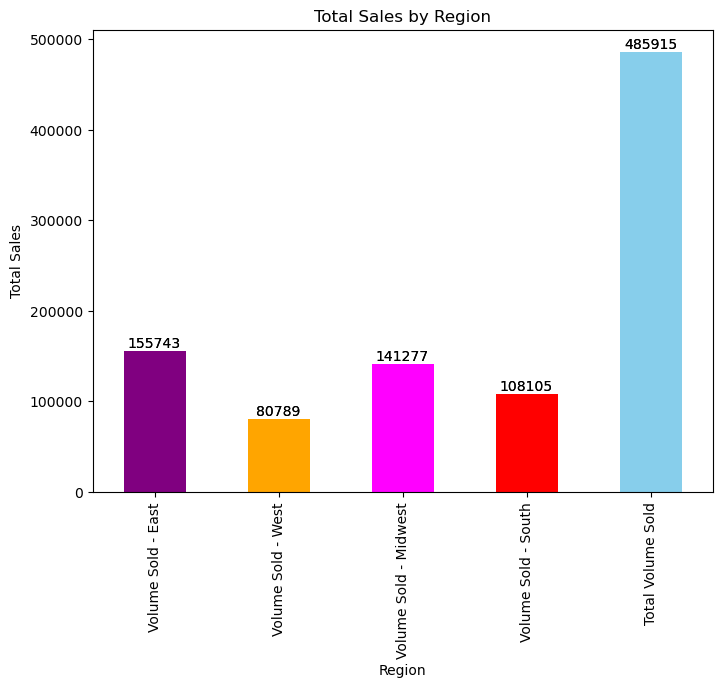

In [164]:
#Visualizations


Total_volume_sold = df[['Volume Sold - East','Volume Sold - West','Volume Sold - Midwest','Volume Sold - South','Total Volume Sold']].sum()

plt.figure(figsize=(8, 6))
ax = Total_volume_sold.plot(kind='bar', color=['purple', 'orange', 'magenta', 'red','skyblue'])
Total_volume_sold.plot(kind='bar', color=['purple', 'orange', 'magenta', 'red','skyblue'])
plt.title('Total Sales by Region')
plt.ylabel('Total Sales')
plt.xlabel('Region')

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2,  
            i.get_height() + 0.5,          
            f'{i.get_height():.0f}',       
            ha='center',                   
            va='bottom',                   
            fontsize=10,                  
            color='black') 

plt.show()

<h1> Inferences </h1>

<h2>From this graph we can see that majority of the sales occured across the East region and the Midwest region. </h2>

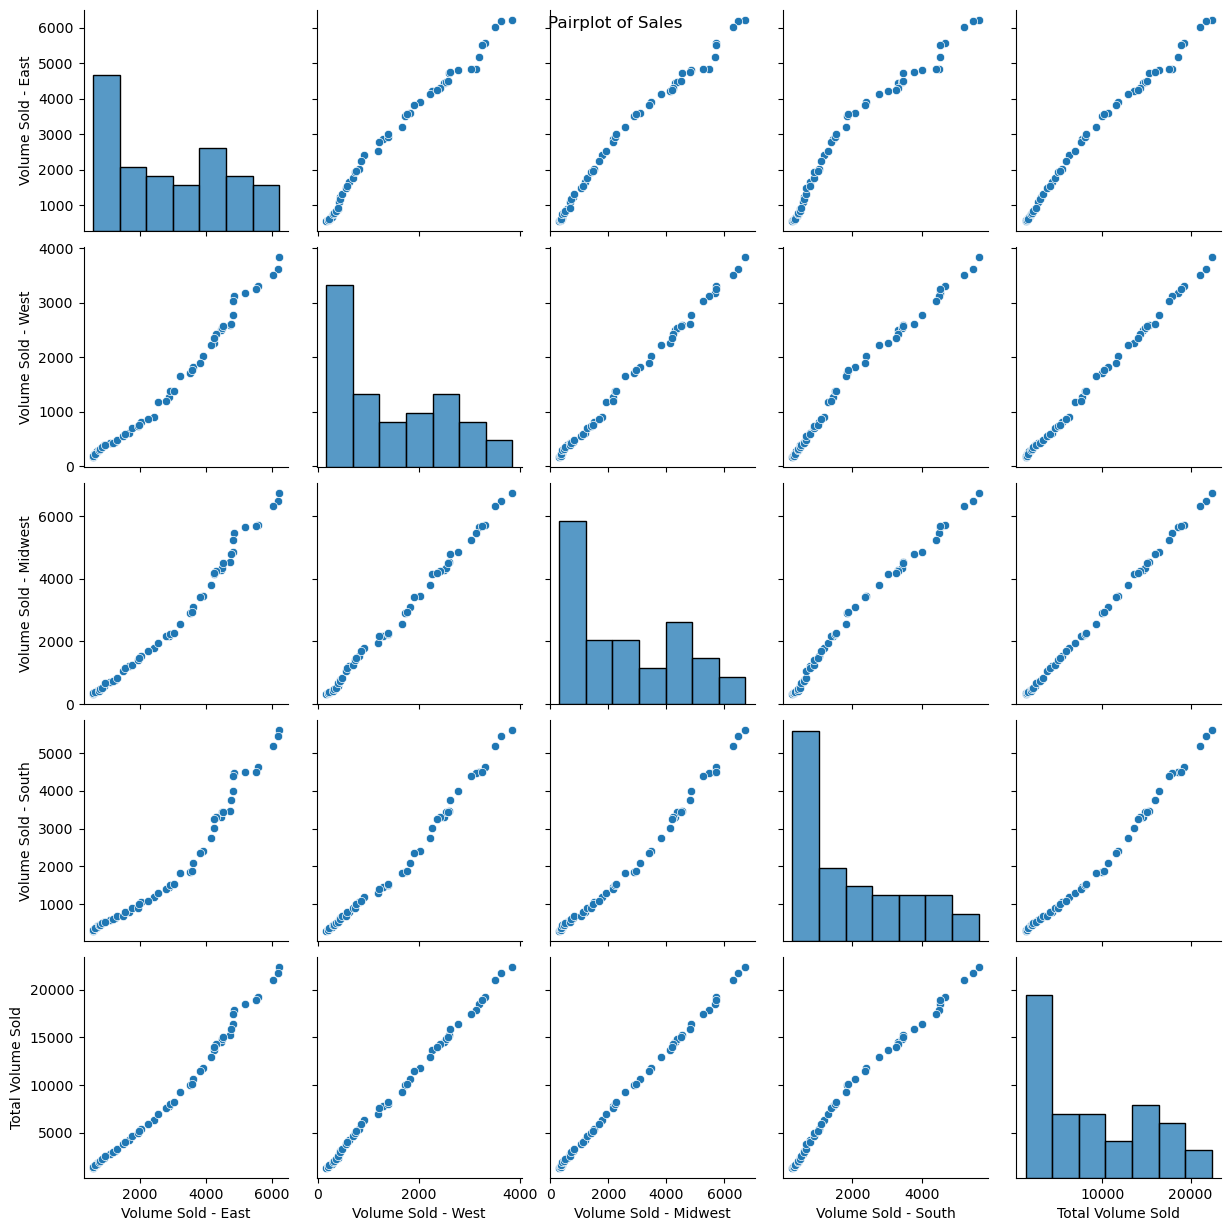

In [165]:
sns.pairplot(df[['Volume Sold - East','Volume Sold - West','Volume Sold - Midwest','Volume Sold - South','Total Volume Sold']])
plt.suptitle('Pairplot of Sales')
plt.show()

<h1> Inferences </h1>

<h2> This pairplot shows us a positive correlation across each region with the slope in an upward direction. </h2>

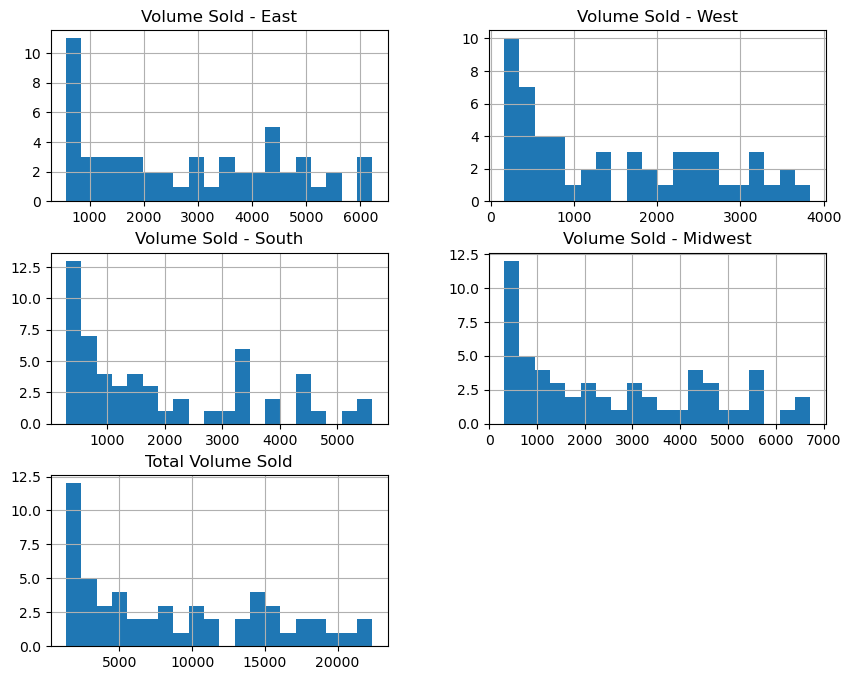

In [166]:
#Histogram

df[['Volume Sold - East', 'Volume Sold - West', 'Volume Sold - South', 'Volume Sold - Midwest','Total Volume Sold']].hist(bins=20, figsize=(10, 8))
plt.title('Sales Distribution across US')
plt.show()


<b> We can see that in all the plots the data points are majorly distributed towards the left side of the plots and we can say that it is positively skewed. </b>

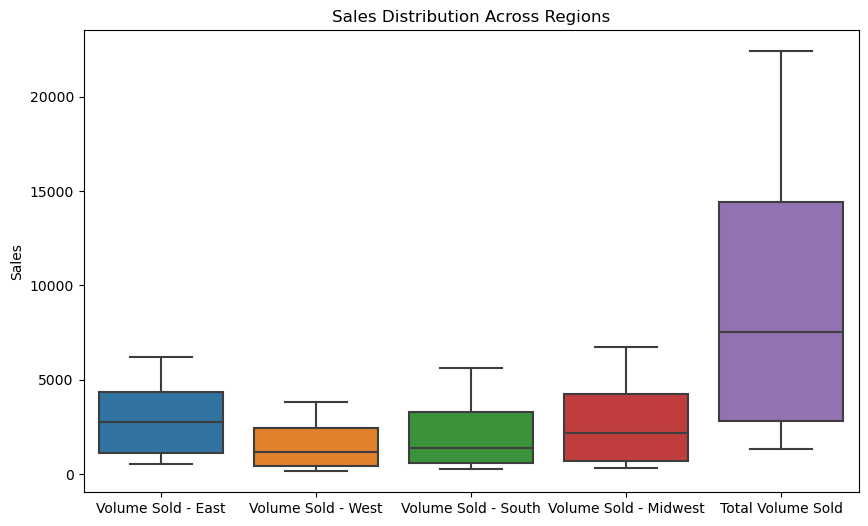

In [167]:
#Boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Volume Sold - East', 'Volume Sold - West', 'Volume Sold - South', 'Volume Sold - Midwest','Total Volume Sold']])
plt.title('Sales Distribution Across Regions')
plt.ylabel('Sales')
plt.show()

<h1> Inferences </h1>

<b> The East shows that the volumes lie from 1000 to <4500 whereas West has volumes ranging from 500 to 2500. South has volume ranging from >500 to <3500 & Midwest has volume ranging from >500 and <4500. The data is not skewed in any column since all of the median points do not lie at the lower or the upper ends of the boxplots. </b>

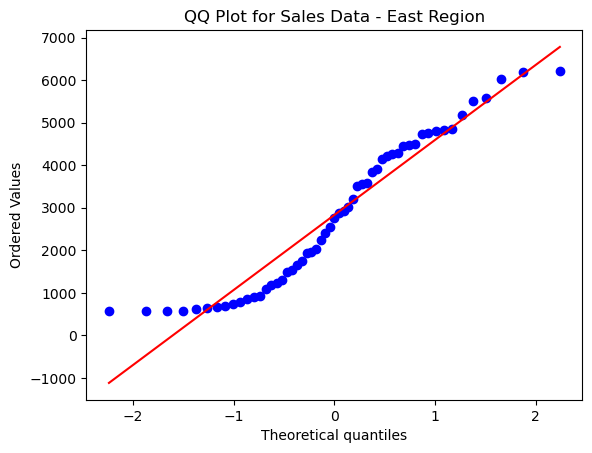

In [168]:
# QQ Plot for Normality

east_data = df['Volume Sold - East']

stats.probplot(east_data, dist="norm", plot=plt)
plt.title('QQ Plot for Sales Data - East Region')
plt.ylabel('Ordered Values')
plt.show()

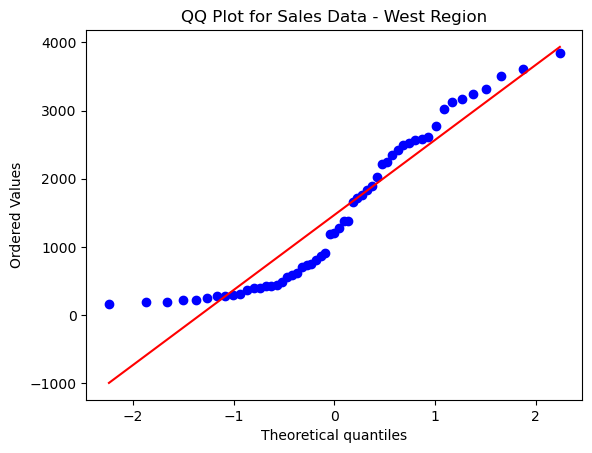

In [169]:
# QQ Plot for Normality

west_data = df['Volume Sold - West']

stats.probplot(west_data, dist="norm", plot=plt)
plt.title('QQ Plot for Sales Data - West Region')
plt.ylabel('Ordered Values')
plt.show()

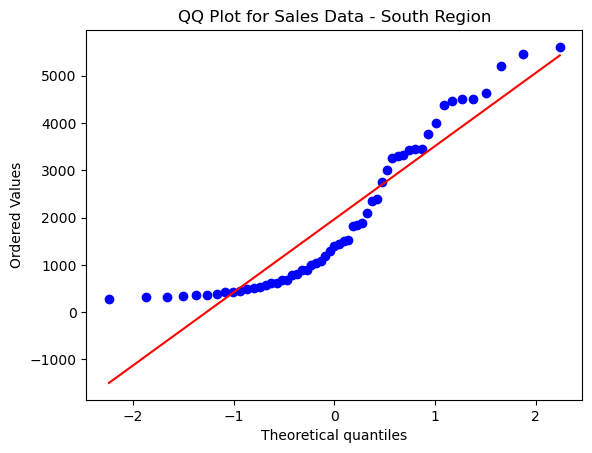

In [170]:
# QQ Plot for Normality

south_data = df['Volume Sold - South']

stats.probplot(south_data, dist="norm", plot=plt)
plt.title('QQ Plot for Sales Data - South Region')
plt.ylabel('Ordered Values')
plt.show()

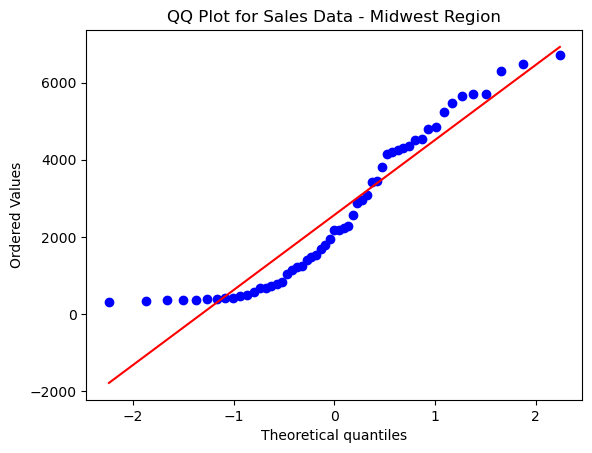

In [171]:
# QQ Plot for Normality

midwest_data = df['Volume Sold - Midwest']

stats.probplot(midwest_data, dist="norm", plot=plt)
plt.title('QQ Plot for Sales Data - Midwest Region')
plt.ylabel('Ordered Values')
plt.show()

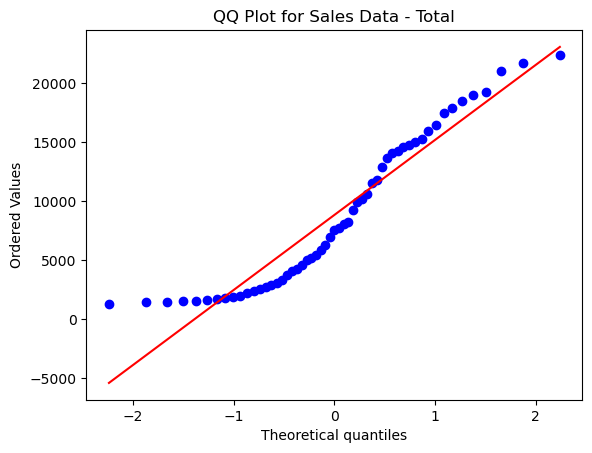

In [172]:
# QQ Plot for Normality

total_area = df['Total Volume Sold']

stats.probplot(total_area, dist="norm", plot=plt)
plt.title('QQ Plot for Sales Data - Total')
plt.ylabel('Ordered Values')
plt.show()

<h1> Inferences </h1>

<b> The lines for all of the areas form a wave like patternwhich indicates that the data is not following a normal 
distribution and also indicates that the data follows a cyclic/periodic behavioural pattern. </b>


<Figure size 1000x600 with 0 Axes>

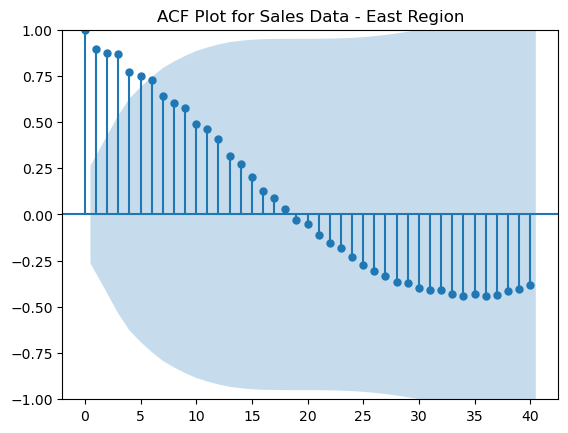

<Figure size 1000x600 with 0 Axes>

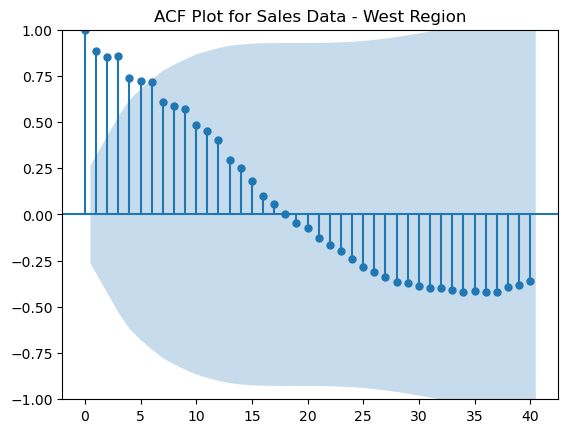

<Figure size 1000x600 with 0 Axes>

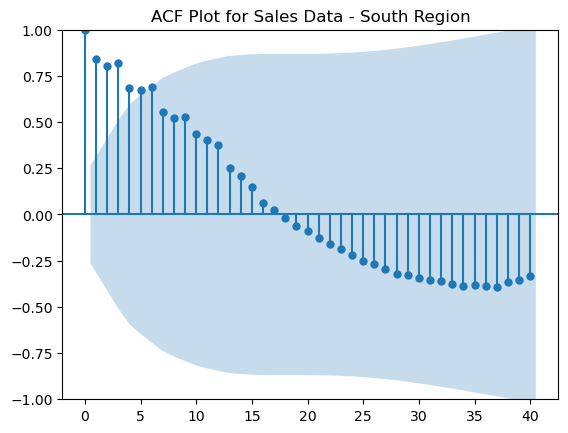

<Figure size 1000x600 with 0 Axes>

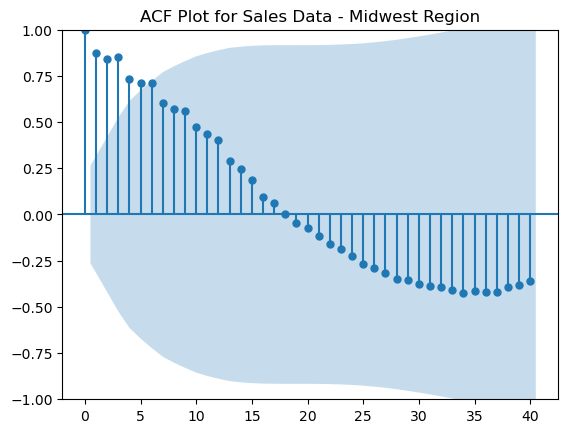

<Figure size 1000x600 with 0 Axes>

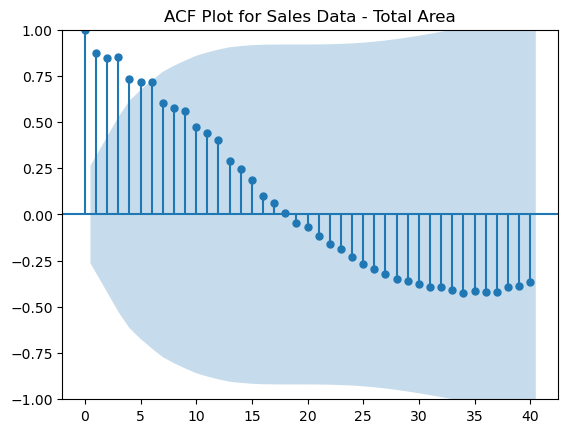

In [173]:
# Acf plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(east_data, lags=40)  
plt.title('ACF Plot for Sales Data - East Region')
plt.show()

# Acf plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(west_data, lags=40)  
plt.title('ACF Plot for Sales Data - West Region')
plt.show()

# Acf plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(south_data, lags=40)  
plt.title('ACF Plot for Sales Data - South Region')
plt.show()

# Acf plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(midwest_data, lags=40)  
plt.title('ACF Plot for Sales Data - Midwest Region')
plt.show()

#Acf plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(total_area, lags=40)  
plt.title('ACF Plot for Sales Data - Total Area')
plt.show()

<h1> Inferences </h1>

<b> There is a gradual decrease in the plot values which suggests the presence of trends or cyclical patterns in the sales data. </b>

In [174]:
df.set_index('Month, Year of week ending date', inplace=True)

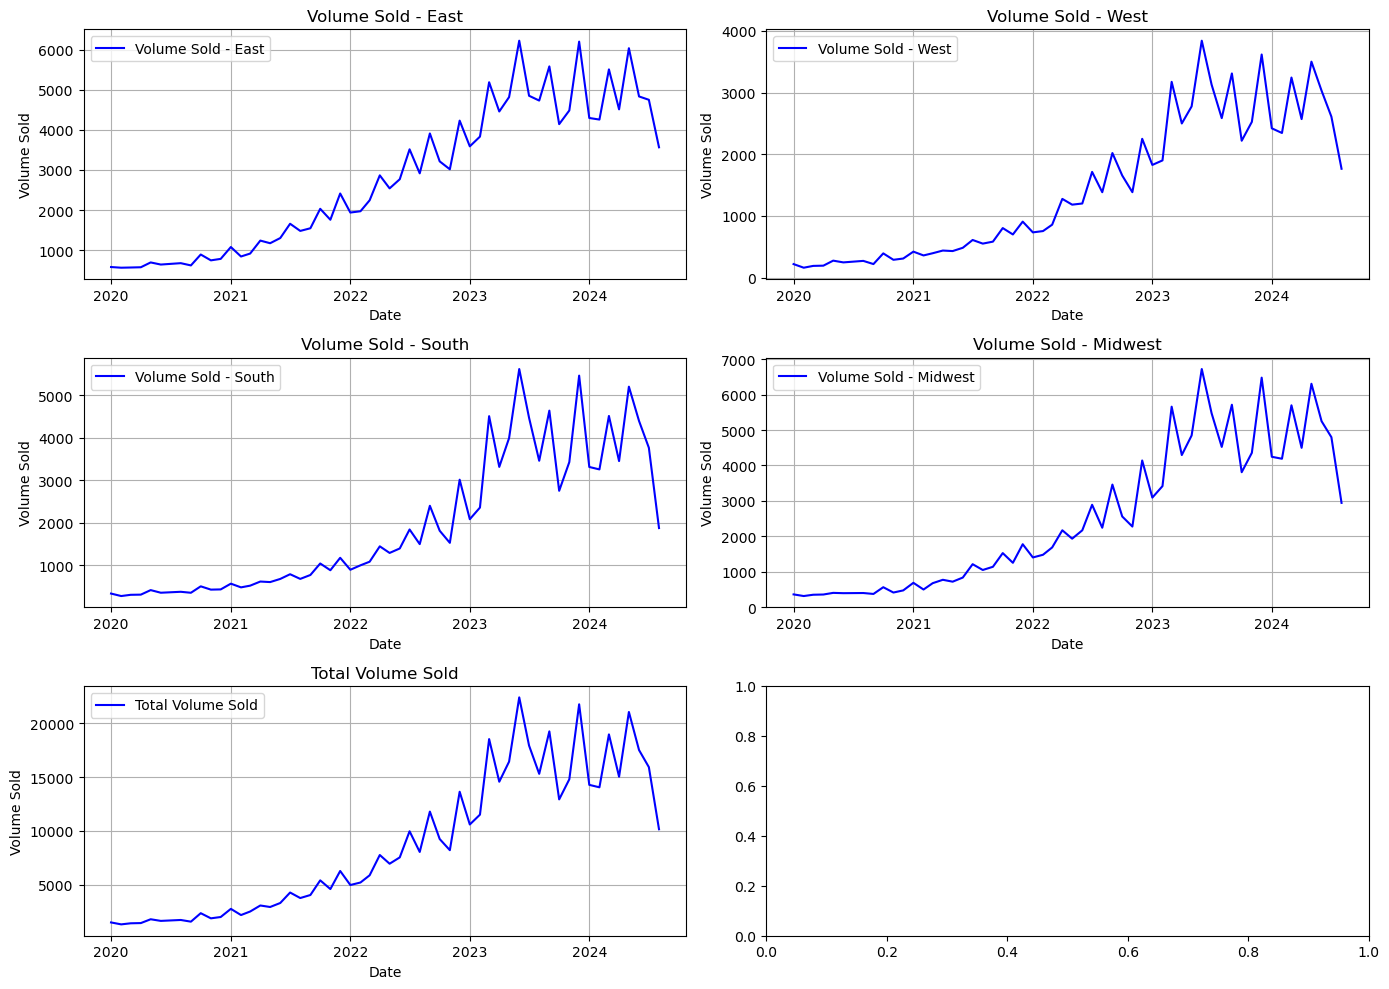

In [175]:
#Time Series plots

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))

axes = axes.flatten()

regions = ['Volume Sold - East', 'Volume Sold - West', 'Volume Sold - South', 'Volume Sold - Midwest', 
           'Total Volume Sold']

for ax, region in zip(axes, regions):
    ax.plot(df.index, df[region], label=region, color='blue')
    ax.set_title(region)
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume Sold')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()


<h1> Inferences </h1>

<b> The plots show us that there a minimal increase from 2020 to 2022 but after that we see that the volumes have increased tremendously. 
There also has been periods where there was a steep decrease in volume sold for each region from 2022 to 2024. </b>

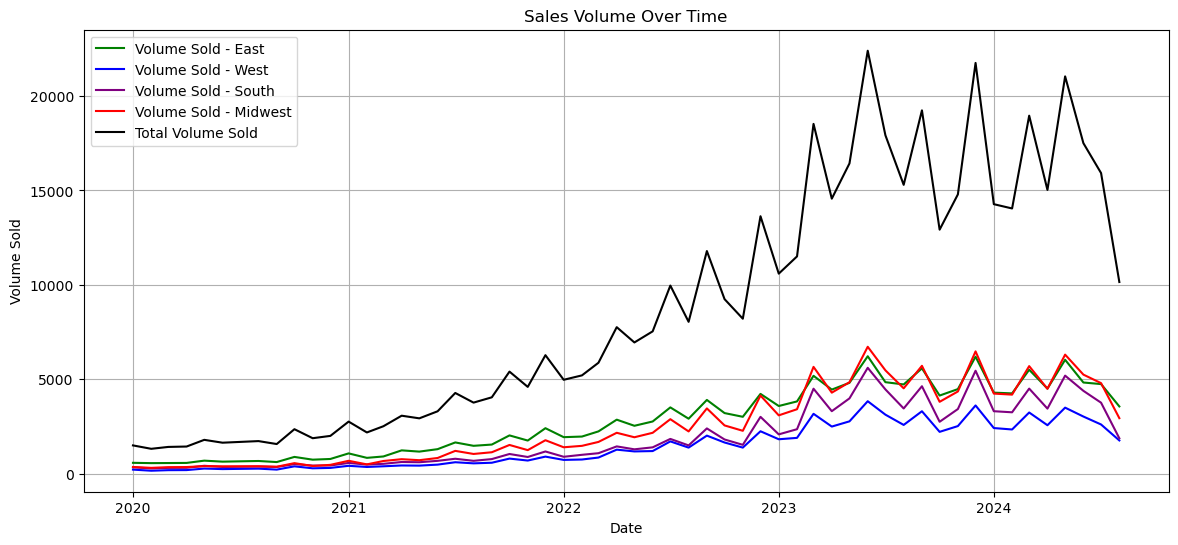

In [176]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))


plt.plot(df.index, df['Volume Sold - East'], label='Volume Sold - East', color='green')
plt.plot(df.index, df['Volume Sold - West'], label='Volume Sold - West', color='blue')
plt.plot(df.index, df['Volume Sold - South'], label='Volume Sold - South', color='purple')
plt.plot(df.index, df['Volume Sold - Midwest'], label='Volume Sold - Midwest', color='red')
plt.plot(df.index, df['Total Volume Sold'], label='Total Volume Sold', color='black')

plt.title('Sales Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Sold')
plt.legend()
plt.grid()
plt.show()


# Week 2 : Data Cleaning and Preprocessing

In [177]:
#checking if the data is stationary

from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Total Volume Sold'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.4428219252960828
p-value: 0.5615834346156521


<h2> Inferences </h2>

<b> From the ADF test, we can see that the p-value is greater than 0.05 which indicates that the data is not stationary. In this case, we would be doing the differencing to convert this non-stationary data into stationary. </b>

In [178]:
df['Total Volume Diff'] = df['Total Volume Sold'].diff()
df.dropna(inplace=True)

In [179]:
result_diff = adfuller(df['Total Volume Diff'])
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])

ADF Statistic: -1.1202343511100785
p-value: 0.7069355997545426


<h2> Inferences </h2>

<b> Here, the p value has not gone below 0.05 so we need to difference it again to ensure stationarity. </b>

In [180]:
df['Total Volume Diff2'] = df['Total Volume Diff'].diff()
df.dropna(inplace=True)

In [181]:
result_diff2 = adfuller(df['Total Volume Diff2'])
print('ADF Statistic:', result_diff2[0])
print('p-value:', result_diff2[1])

ADF Statistic: -4.353159076624482
p-value: 0.00035891692449874804


<h2> Inferences </h2>

<b> We can now say that the data is stationary since a p-value of 0.00035 indicates that the data is good enough to be considered stationary. </b>

In [182]:
#Performing Decomposition on the differenced data


df.head(10)

,Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold,Total Volume Diff,Total Volume Diff2
"Month, Year of week ending date",,,,,,,
2020-03-01,568.6050,190.9875,312.2535,350.0440,1421.8900,99.7190,279.3550
2020-04-01,574.8490,194.8790,316.1860,356.3410,1442.2550,20.3650,-79.3540
2020-05-01,695.0190,276.1740,422.6145,402.7915,1796.5990,354.3440,333.9790
2020-06-01,642.3145,247.8220,360.9805,394.1560,1645.2730,-151.3260,-505.6700
2020-08-01,676.7035,272.1830,383.0140,398.5955,1730.4960,85.2230,236.5490
2020-09-01,620.6850,220.7355,360.1145,372.5570,1574.0920,-156.4040,-241.6270
2020-10-01,892.4715,393.8955,511.1435,562.6380,2360.1485,786.0565,942.4605
2020-11-01,746.8080,289.8285,433.9220,412.4770,1883.0355,-477.1130,-1263.1695
2020-12-01,783.6345,310.4885,438.8550,472.6485,2005.6265,122.5910,599.7040


In [183]:
df.describe()

,Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold,Total Volume Diff,Total Volume Diff2
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,2916.969396,1517.124972,2027.923462,2652.901915,9114.919745,166.599283,-105.430632
std,1757.913960,1119.279317,1606.680118,1976.861459,6434.516118,3111.041806,5204.154056
min,568.605000,190.987500,312.253500,350.044000,1421.890000,-7477.375500,-14435.937000
25%,1239.457500,439.740500,623.466500,772.094000,3074.758500,-1036.024500,-1480.590500
50%,2865.156500,1276.990500,1449.660000,2169.896000,7761.703000,122.591000,596.771000
75%,4457.136500,2499.404500,3313.677000,4294.539500,14564.757500,1360.503500,1952.376000
max,6221.659500,3841.101500,5610.439500,6723.577000,22396.777500,7015.673000,9942.185500


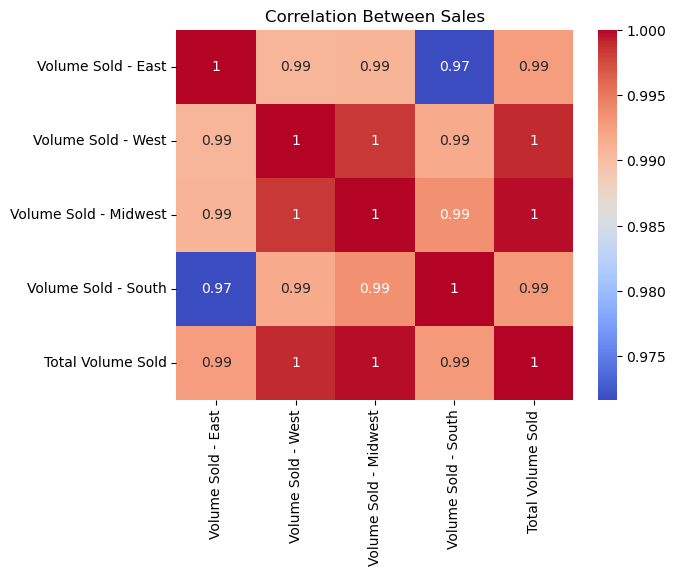

In [184]:
# Correlation matrix
correlation_matrix = df[['Volume Sold - East', 'Volume Sold - West', 'Volume Sold - Midwest', 'Volume Sold - South',
                         'Total Volume Sold']].corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Sales')
plt.show()


<h1> Inferences </h1>

<b> From the correlation matrix, we can see that mostly all of the columns have a high correlation between them. This means that the regions do not exhibit any independent features between them and they all are dependant. </b>

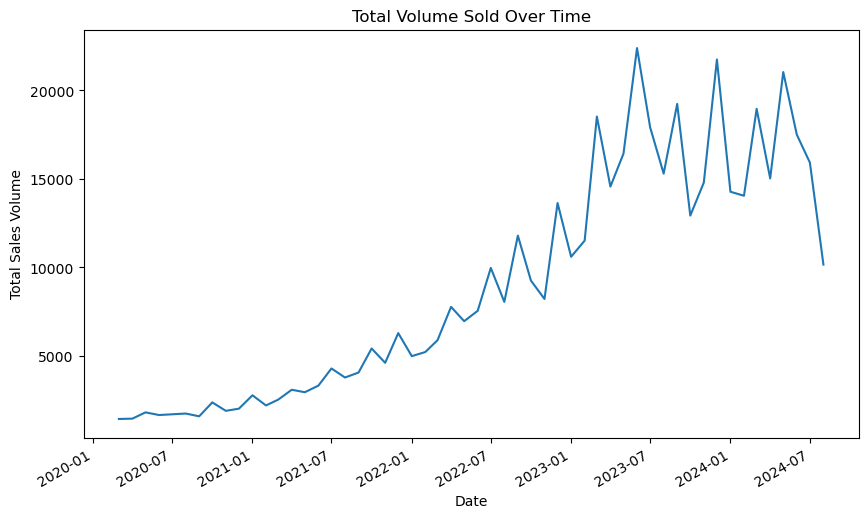

In [185]:
plt.figure(figsize=(10, 6))
df['Total Volume Sold'].plot()
plt.title('Total Volume Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Volume')
plt.show()


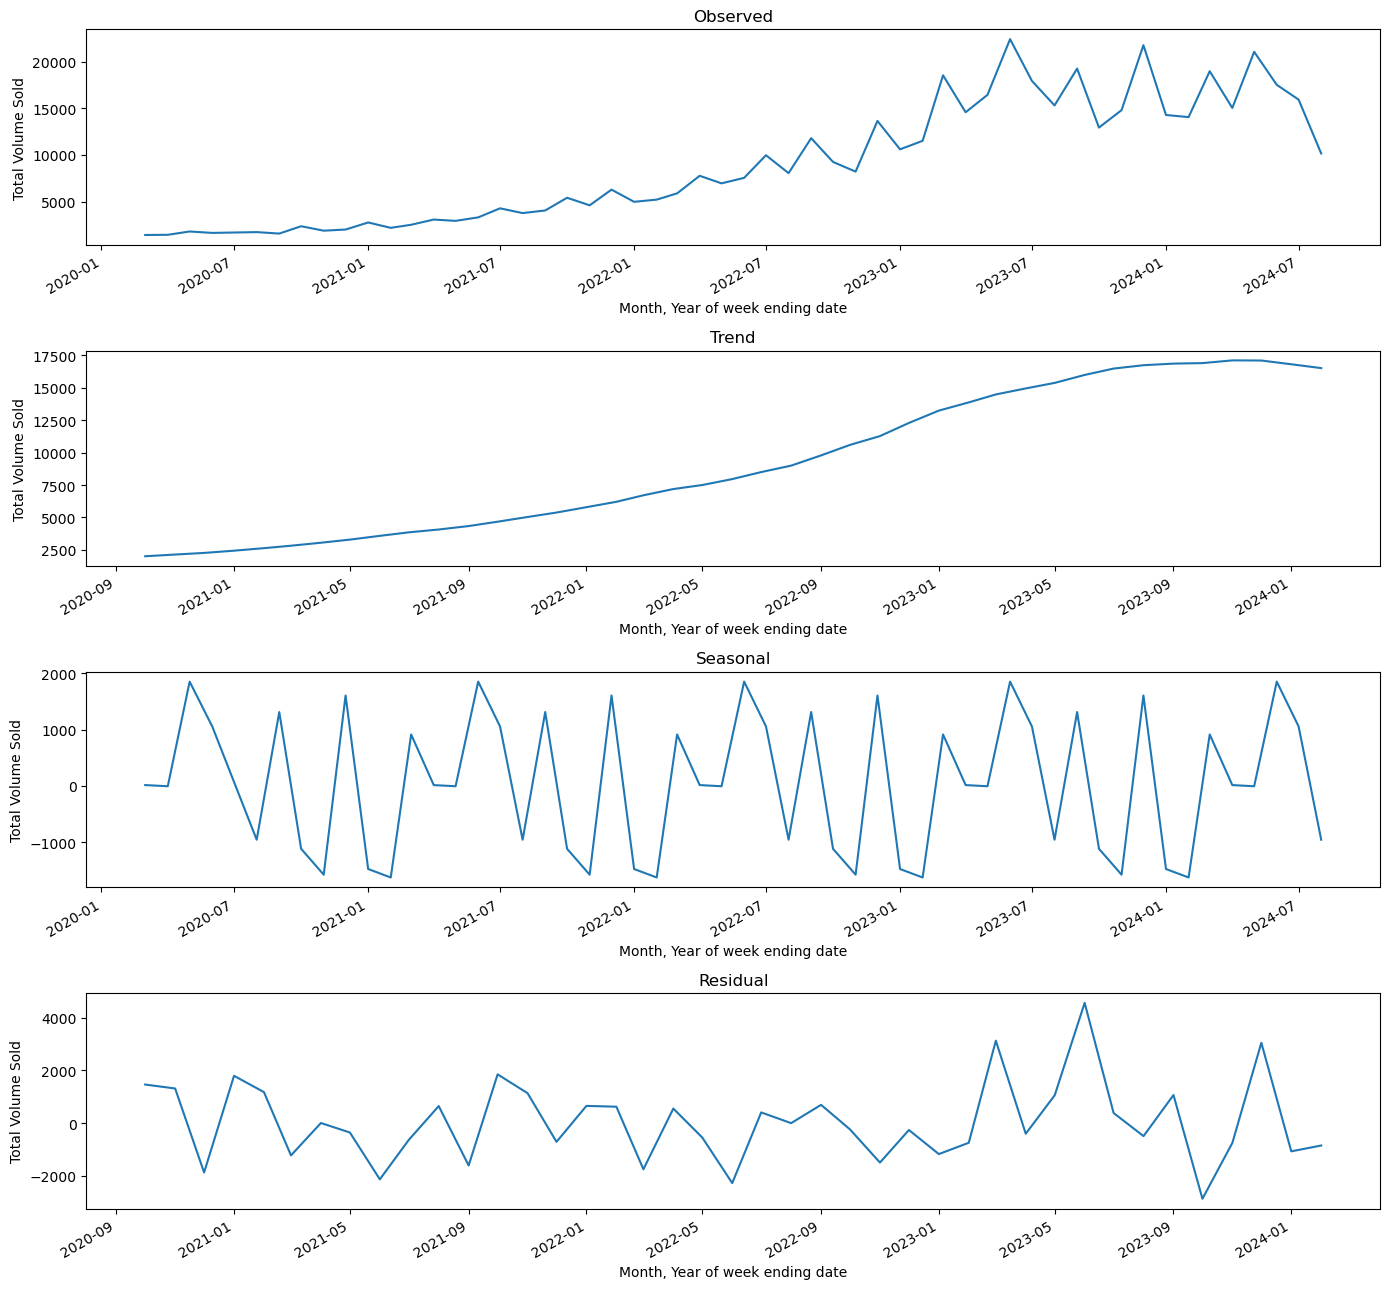

In [186]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Decomposition on the total volume sold column
decomposition = seasonal_decompose(df['Total Volume Sold'], model='additive', period=12)

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 13))

decomposition.observed.plot(ax=axes[0], legend=False)
axes[0].set_title('Observed')
axes[0].set_ylabel('Total Volume Sold')

decomposition.trend.plot(ax=axes[1], legend=False)
axes[1].set_title('Trend')
axes[1].set_ylabel('Total Volume Sold')

decomposition.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_title('Seasonal')
axes[2].set_ylabel('Total Volume Sold')

decomposition.resid.plot(ax=axes[3], legend=False)
axes[3].set_title('Residual')
axes[3].set_ylabel('Total Volume Sold')

plt.tight_layout()
plt.show()

<h1> Inferences : Observed Plot </h1>

<b> 1. For the observed values, we see that initially the product took a bit of time to get established in the market till 2022 after which sales started growing rapidly across USA. This can be due to improved market conditions, better product awareness. </b>
<br> 
<b> 2. We can also see that there is a volatile component too in the graph because of the spikes post 2022. </b>

<h1> Inferences : Seasonal Plot </h1>

<b> We can see that the data does have seasonality as the pattern keeps fluctuating after a particular period of time </b>

<h1> Inferences : Residuals </h1> 

<b> The residual plot shows us that there is fluctuating data which means that all of the data may not be captured by decomposition. </b>


In [187]:
#Finding the outliers using z score method

z_scores = stats.zscore(df['Total Volume Sold'])
outliers = df[(z_scores > 3) | (z_scores < -3)]

In [188]:
print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [Volume Sold - East, Volume Sold - West, Volume Sold - South, Volume Sold - Midwest, Total Volume Sold, Total Volume Diff, Total Volume Diff2]
Index: []


<b> This indicates that we were unable to find the outliers and the dataset seems to be stable & consistent. </b>

In [189]:
df.head()

,Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold,Total Volume Diff,Total Volume Diff2
"Month, Year of week ending date",,,,,,,
2020-03-01,568.6050,190.9875,312.2535,350.0440,1421.890,99.719,279.355
2020-04-01,574.8490,194.8790,316.1860,356.3410,1442.255,20.365,-79.354
2020-05-01,695.0190,276.1740,422.6145,402.7915,1796.599,354.344,333.979
2020-06-01,642.3145,247.8220,360.9805,394.1560,1645.273,-151.326,-505.670
2020-08-01,676.7035,272.1830,383.0140,398.5955,1730.496,85.223,236.549


# Week 3 : EDA and Feature Engineering

<b>Since we need our data to find the residuals entirely, i am performing a comparision to check if an additive model would be best or multiplicative model would work better. </b>

In [190]:
# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Total Volume Sold'], model='additive', period=12)
additive_residuals = additive_decomposition.resid.dropna()


print("Additive Residuals:")
print(additive_residuals.describe())

Additive Residuals:
count      41.000000
mean       52.634232
std      1535.581425
min     -2862.802366
25%      -846.491268
50%      -237.337054
75%      1057.227802
max      4556.317941
Name: resid, dtype: float64


In [191]:
# Multiplicative Decomposition

multiplicative_decomposition = seasonal_decompose(df['Total Volume Sold'], model='multiplicative', period=12)
multiplicative_residuals = multiplicative_decomposition.resid.dropna()


print("Multiplicative Residuals:")
print(multiplicative_residuals.describe())

Multiplicative Residuals:
count    41.000000
mean      0.992184
std       0.120310
min       0.765087
25%       0.918926
50%       0.983597
75%       1.044752
max       1.274792
Name: resid, dtype: float64


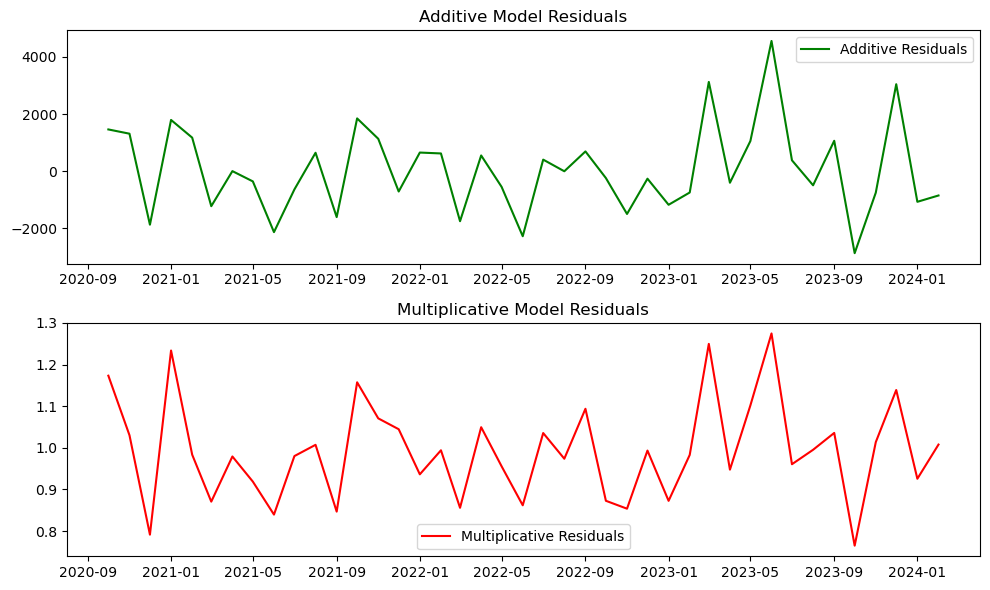

In [192]:
#Additive
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(additive_residuals, label='Additive Residuals', color = 'green')
plt.title('Additive Model Residuals')
plt.legend()


#multiplicative
plt.subplot(2, 1, 2)
plt.plot(multiplicative_residuals, label='Multiplicative Residuals', color='red')
plt.title('Multiplicative Model Residuals')
plt.legend()

plt.tight_layout()
plt.show()

<h1> Inferences </h1>


<b> We can conclude from this plot and the statistics that a multiplicative model would be the best for the residuals as it has a lower mean and a standard deviation as compared to the Additive mnodel.</b>

<Figure size 1000x600 with 0 Axes>

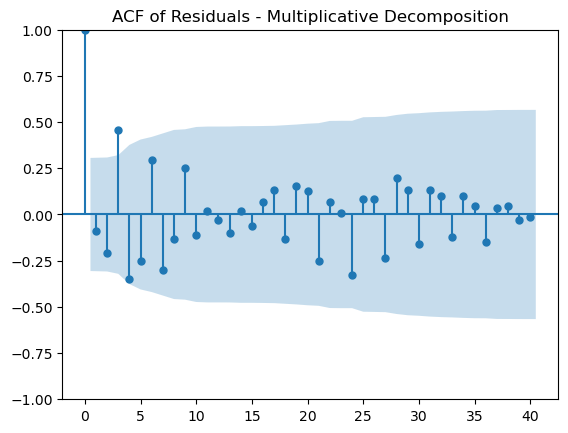

In [193]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF for residuals
plt.figure(figsize=(10, 6))
plot_acf(decomposition.resid.dropna(), lags=40)
plt.title('ACF of Residuals - Multiplicative Decomposition')
plt.show()


<h1> Inferences from the ACF plot : </h1>

<b> Most points lie within the confidence interval of the ACF plot and from this we can confirm that the model is capturing all the Residuals now </b>

In [194]:
decomposition = seasonal_decompose(df['Total Volume Sold'], model = 'multiplicative', period = 12)

residual_values = decomposition.resid.dropna()

In [195]:
#Adding a lag feature to the dataset since the Ljung-box test p value is less than 0.05

df['lag_1'] = df['Total Volume Sold'].shift(1)  # This references 1 month
df['lag_2'] = df['Total Volume Sold'].shift(2)  # This references previous 2 months
df['lag_3'] = df['Total Volume Sold'].shift(3)  # This references previous 3 months


df[['Total Volume Sold', 'lag_1', 'lag_2', 'lag_3']].head(10)

,Total Volume Sold,lag_1,lag_2,lag_3
"Month, Year of week ending date",,,,
2020-03-01,1421.8900,NaN,NaN,NaN
2020-04-01,1442.2550,1421.8900,NaN,NaN
2020-05-01,1796.5990,1442.2550,1421.8900,NaN
2020-06-01,1645.2730,1796.5990,1442.2550,1421.8900
2020-08-01,1730.4960,1645.2730,1796.5990,1442.2550
2020-09-01,1574.0920,1730.4960,1645.2730,1796.5990
2020-10-01,2360.1485,1574.0920,1730.4960,1645.2730
2020-11-01,1883.0355,2360.1485,1574.0920,1730.4960
2020-12-01,2005.6265,1883.0355,2360.1485,1574.0920


In [196]:
#Dropping the NAN value rows

df = df.dropna()

In [197]:
df.head()

,Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold,Total Volume Diff,Total Volume Diff2,lag_1,lag_2,lag_3
"Month, Year of week ending date",,,,,,,,,,
2020-06-01,642.3145,247.8220,360.9805,394.1560,1645.2730,-151.3260,-505.6700,1796.5990,1442.255,1421.890
2020-08-01,676.7035,272.1830,383.0140,398.5955,1730.4960,85.2230,236.5490,1645.2730,1796.599,1442.255
2020-09-01,620.6850,220.7355,360.1145,372.5570,1574.0920,-156.4040,-241.6270,1730.4960,1645.273,1796.599
2020-10-01,892.4715,393.8955,511.1435,562.6380,2360.1485,786.0565,942.4605,1574.0920,1730.496,1645.273
2020-11-01,746.8080,289.8285,433.9220,412.4770,1883.0355,-477.1130,-1263.1695,2360.1485,1574.092,1730.496


In [198]:
#Adding a moving average feature of 3,6,12 months to understand short term fluctuations and long term.

df['MA_3'] = df['Total Volume Sold'].rolling(window=3).mean()

df['MA_6'] = df['Total Volume Sold'].rolling(window=6).mean()

df['MA_12'] = df['Total Volume Sold'].rolling(window=12).mean()

df[['Total Volume Sold', 'MA_3', 'MA_6', 'MA_12']].head(20)

,Total Volume Sold,MA_3,MA_6,MA_12
"Month, Year of week ending date",,,,
2020-06-01,1645.2730,NaN,NaN,NaN
2020-08-01,1730.4960,NaN,NaN,NaN
2020-09-01,1574.0920,1649.953667,NaN,NaN
2020-10-01,2360.1485,1888.245500,NaN,NaN
2020-11-01,1883.0355,1939.092000,NaN,NaN
2020-12-01,2005.6265,2082.936833,1866.445250,NaN
2021-01-01,2761.9565,2216.872833,2052.559167,NaN
2021-02-01,2187.7755,2318.452833,2128.772417,NaN
2021-03-01,2516.4655,2488.732500,2285.834667,NaN


In [199]:
#Removing NA values

df = df.dropna(subset=['MA_3','MA_6','MA_12'])

In [200]:
df.head(5)

,Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold,Total Volume Diff,Total Volume Diff2,lag_1,lag_2,lag_3,MA_3,MA_6,MA_12
"Month, Year of week ending date",,,,,,,,,,,,,
2021-06-01,1303.1100,484.5940,685.0375,835.425,3308.1665,373.0980,512.7880,2935.0685,3074.7585,2516.4655,3105.997833,2797.365167,2331.905208
2021-07-01,1659.0370,611.1325,795.3010,1212.565,4278.0355,969.8690,596.7710,3308.1665,2935.0685,3074.7585,3507.090167,3050.045000,2551.302083
2021-08-01,1480.3970,552.1740,685.5610,1049.182,3767.3140,-510.7215,-1480.5905,4278.0355,3308.1665,2935.0685,3784.505333,3313.301417,2721.036917
2021-09-01,1546.8165,584.1775,777.5445,1139.434,4047.9725,280.6585,791.3800,3767.3140,4278.0355,3308.1665,4031.107333,3568.552583,2927.193625
2021-10-01,2031.4420,803.9715,1047.2905,1525.772,5408.4760,1360.5035,1079.8450,4047.9725,3767.3140,4278.0355,4407.920833,3957.505500,3181.220917


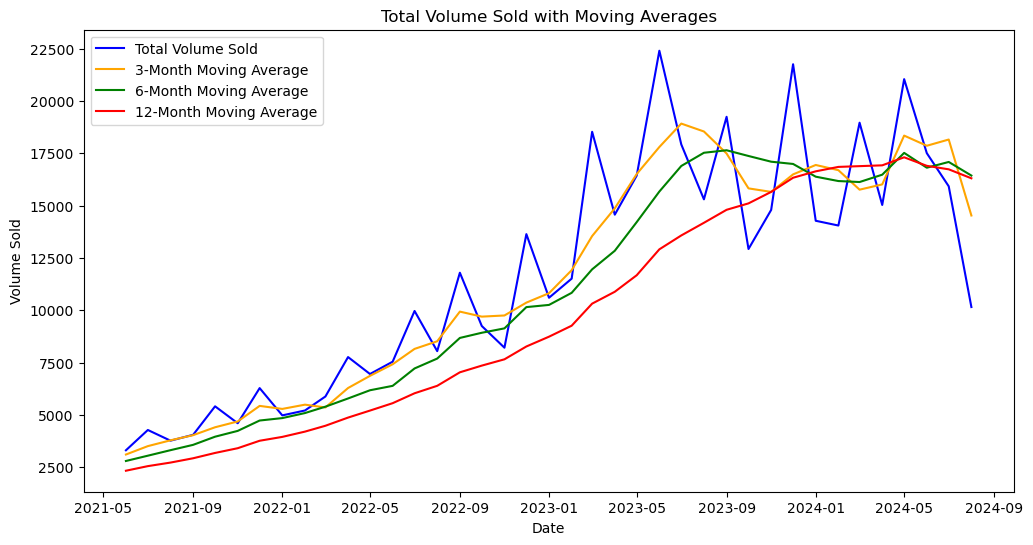

In [201]:
plt.figure(figsize=(12, 6))
plt.plot(df['Total Volume Sold'], label='Total Volume Sold', color='blue')
plt.plot(df['MA_3'], label='3-Month Moving Average', color='orange')
plt.plot(df['MA_6'], label='6-Month Moving Average', color='green')
plt.plot(df['MA_12'], label='12-Month Moving Average', color='red')
plt.title('Total Volume Sold with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Volume Sold')
plt.legend()
plt.show()


<h1> Inferences </h1>

<b> The yellow line tell us that the short term sales trend matches with the Total volume sold graph & it shows consistent growth after January 2023.
The increase after January 2023 tells us that sales were on the rising during this period.</b>

<b> The green line is a much more smoothed out line which indicates that the sales are more gradual over the period of time. This line also shows the spike at a later stage as compared to the 3 month yellow line.</b>

<b> The gradual increase of the red line suggests that the long-term trend in sales is improving. We can see that the red line does not have a decrease which indicates that the drug gained good amount of traction & it's also possible that there were good marketing strategies being run during that time.</b>

In [202]:
#Seasonal lag feature

df['Sales_Last_Year'] = df['Total Volume Sold'].shift(12)

<b> This seasonal lag feature will capture the sales value from a previous time period </b>

In [203]:
df['Sales_Last_Year'].head(20)

Month, Year of week ending date
2021-06-01          NaN
2021-07-01          NaN
2021-08-01          NaN
2021-09-01          NaN
2021-10-01          NaN
2021-11-01          NaN
2021-12-01          NaN
2022-01-01          NaN
2022-02-01          NaN
2022-03-01          NaN
2022-04-01          NaN
2022-05-01          NaN
2022-06-01    3308.1665
2022-07-01    4278.0355
2022-08-01    3767.3140
2022-09-01    4047.9725
2022-10-01    5408.4760
2022-11-01    4599.7310
2022-12-01    6278.8185
2023-01-01    4975.6300
Name: Sales_Last_Year, dtype: float64

In [204]:
df.dropna(inplace = True)

In [205]:
df['Sales_Last_Year'].head(20)

Month, Year of week ending date
2022-06-01     3308.1665
2022-07-01     4278.0355
2022-08-01     3767.3140
2022-09-01     4047.9725
2022-10-01     5408.4760
2022-11-01     4599.7310
2022-12-01     6278.8185
2023-01-01     4975.6300
2023-02-01     5209.2735
2023-03-01     5878.2500
2023-04-01     7761.7030
2023-05-01     6952.5365
2023-06-01     7539.9930
2023-07-01     9963.9795
2023-08-01     8044.4840
2023-09-01    11791.1385
2023-10-01     9245.2180
2023-11-01     8209.1935
2023-12-01    13634.6575
2024-01-01    10595.2750
Name: Sales_Last_Year, dtype: float64

In [206]:
df.head()

,Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold,Total Volume Diff,Total Volume Diff2,lag_1,lag_2,lag_3,MA_3,MA_6,MA_12,Sales_Last_Year
"Month, Year of week ending date",,,,,,,,,,,,,,
2022-06-01,2768.5450,1202.3275,1399.6625,2169.458,7539.9930,587.4565,1396.623,6952.5365,7761.7030,5878.2500,7418.077500,6386.231000,5558.144458,3308.1665
2022-07-01,3514.1645,1714.3470,1845.2660,2890.202,9963.9795,2423.9865,1836.530,7539.9930,6952.5365,7761.7030,8152.169667,7217.622583,6031.973125,4278.0355
2022-08-01,2915.4455,1385.1905,1501.4880,2242.360,8044.4840,-1919.4955,-4343.482,9963.9795,7539.9930,6952.5365,8516.152167,7690.157667,6388.403958,3767.3140
2022-09-01,3909.5145,2019.9965,2401.1825,3460.445,11791.1385,3746.6545,5666.150,8044.4840,9963.9795,7539.9930,9933.200667,8675.639083,7033.667792,4047.9725
2022-10-01,3213.6615,1655.9880,1815.7755,2559.793,9245.2180,-2545.9205,-6292.575,11791.1385,8044.4840,9963.9795,9693.613500,8922.891583,7353.396292,5408.4760


In [207]:
#Comparision between this year sales and last year sales

df['Sales_Change_YoY'] = df['Total Volume Sold'] - df['Sales_Last_Year']

df.head(10)

,Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold,Total Volume Diff,Total Volume Diff2,lag_1,lag_2,lag_3,MA_3,MA_6,MA_12,Sales_Last_Year,Sales_Change_YoY
"Month, Year of week ending date",,,,,,,,,,,,,,,
2022-06-01,2768.5450,1202.3275,1399.6625,2169.4580,7539.9930,587.4565,1396.6230,6952.5365,7761.7030,5878.2500,7418.077500,6386.231000,5558.144458,3308.1665,4231.8265
2022-07-01,3514.1645,1714.3470,1845.2660,2890.2020,9963.9795,2423.9865,1836.5300,7539.9930,6952.5365,7761.7030,8152.169667,7217.622583,6031.973125,4278.0355,5685.9440
2022-08-01,2915.4455,1385.1905,1501.4880,2242.3600,8044.4840,-1919.4955,-4343.4820,9963.9795,7539.9930,6952.5365,8516.152167,7690.157667,6388.403958,3767.3140,4277.1700
2022-09-01,3909.5145,2019.9965,2401.1825,3460.4450,11791.1385,3746.6545,5666.1500,8044.4840,9963.9795,7539.9930,9933.200667,8675.639083,7033.667792,4047.9725,7743.1660
2022-10-01,3213.6615,1655.9880,1815.7755,2559.7930,9245.2180,-2545.9205,-6292.5750,11791.1385,8044.4840,9963.9795,9693.613500,8922.891583,7353.396292,5408.4760,3836.7420
2022-11-01,3016.5190,1385.7345,1531.7065,2275.2335,8209.1935,-1036.0245,1509.8960,9245.2180,11791.1385,8044.4840,9748.516667,9132.334417,7654.184833,4599.7310,3609.4625
2022-12-01,4229.1930,2250.6215,3013.6910,4141.1520,13634.6575,5425.4640,6461.4885,8209.1935,9245.2180,11791.1385,10363.023000,10148.111833,8267.171417,6278.8185,7355.8390
2023-01-01,3588.3865,1827.4735,2086.4285,3092.9865,10595.2750,-3039.3825,-8464.8465,13634.6575,8209.1935,9245.2180,10813.042000,10253.327750,8735.475167,4975.6300,5619.6450
2023-02-01,3830.8030,1900.5875,2359.5850,3417.0745,11508.0500,912.7750,3952.1575,10595.2750,13634.6575,8209.1935,11912.660833,10830.588750,9260.373208,5209.2735,6298.7765


In [208]:
df.head()

,Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold,Total Volume Diff,Total Volume Diff2,lag_1,lag_2,lag_3,MA_3,MA_6,MA_12,Sales_Last_Year,Sales_Change_YoY
"Month, Year of week ending date",,,,,,,,,,,,,,,
2022-06-01,2768.5450,1202.3275,1399.6625,2169.458,7539.9930,587.4565,1396.623,6952.5365,7761.7030,5878.2500,7418.077500,6386.231000,5558.144458,3308.1665,4231.8265
2022-07-01,3514.1645,1714.3470,1845.2660,2890.202,9963.9795,2423.9865,1836.530,7539.9930,6952.5365,7761.7030,8152.169667,7217.622583,6031.973125,4278.0355,5685.9440
2022-08-01,2915.4455,1385.1905,1501.4880,2242.360,8044.4840,-1919.4955,-4343.482,9963.9795,7539.9930,6952.5365,8516.152167,7690.157667,6388.403958,3767.3140,4277.1700
2022-09-01,3909.5145,2019.9965,2401.1825,3460.445,11791.1385,3746.6545,5666.150,8044.4840,9963.9795,7539.9930,9933.200667,8675.639083,7033.667792,4047.9725,7743.1660
2022-10-01,3213.6615,1655.9880,1815.7755,2559.793,9245.2180,-2545.9205,-6292.575,11791.1385,8044.4840,9963.9795,9693.613500,8922.891583,7353.396292,5408.4760,3836.7420


In [209]:
# Moving Standard Deviation

df['Moving_Std_3'] = df['Total Volume Sold'].rolling(window=3).std()

In [210]:
df.head(10)

,Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold,Total Volume Diff,Total Volume Diff2,lag_1,lag_2,lag_3,MA_3,MA_6,MA_12,Sales_Last_Year,Sales_Change_YoY,Moving_Std_3
"Month, Year of week ending date",,,,,,,,,,,,,,,,
2022-06-01,2768.5450,1202.3275,1399.6625,2169.4580,7539.9930,587.4565,1396.6230,6952.5365,7761.7030,5878.2500,7418.077500,6386.231000,5558.144458,3308.1665,4231.8265,NaN
2022-07-01,3514.1645,1714.3470,1845.2660,2890.2020,9963.9795,2423.9865,1836.5300,7539.9930,6952.5365,7761.7030,8152.169667,7217.622583,6031.973125,4278.0355,5685.9440,NaN
2022-08-01,2915.4455,1385.1905,1501.4880,2242.3600,8044.4840,-1919.4955,-4343.4820,9963.9795,7539.9930,6952.5365,8516.152167,7690.157667,6388.403958,3767.3140,4277.1700,1278.976459
2022-09-01,3909.5145,2019.9965,2401.1825,3460.4450,11791.1385,3746.6545,5666.1500,8044.4840,9963.9795,7539.9930,9933.200667,8675.639083,7033.667792,4047.9725,7743.1660,1873.516877
2022-10-01,3213.6615,1655.9880,1815.7755,2559.7930,9245.2180,-2545.9205,-6292.5750,11791.1385,8044.4840,9963.9795,9693.613500,8922.891583,7353.396292,5408.4760,3836.7420,1913.151557
2022-11-01,3016.5190,1385.7345,1531.7065,2275.2335,8209.1935,-1036.0245,1509.8960,9245.2180,11791.1385,8044.4840,9748.516667,9132.334417,7654.184833,4599.7310,3609.4625,1843.248398
2022-12-01,4229.1930,2250.6215,3013.6910,4141.1520,13634.6575,5425.4640,6461.4885,8209.1935,9245.2180,11791.1385,10363.023000,10148.111833,8267.171417,6278.8185,7355.8390,2880.283131
2023-01-01,3588.3865,1827.4735,2086.4285,3092.9865,10595.2750,-3039.3825,-8464.8465,13634.6575,8209.1935,9245.2180,10813.042000,10253.327750,8735.475167,4975.6300,5619.6450,2719.279639
2023-02-01,3830.8030,1900.5875,2359.5850,3417.0745,11508.0500,912.7750,3952.1575,10595.2750,13634.6575,8209.1935,11912.660833,10830.588750,9260.373208,5209.2735,6298.7765,1559.565305


In [211]:
df.dropna(inplace = True)

In [212]:
df.head()

,Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold,Total Volume Diff,Total Volume Diff2,lag_1,lag_2,lag_3,MA_3,MA_6,MA_12,Sales_Last_Year,Sales_Change_YoY,Moving_Std_3
"Month, Year of week ending date",,,,,,,,,,,,,,,,
2022-08-01,2915.4455,1385.1905,1501.4880,2242.3600,8044.4840,-1919.4955,-4343.4820,9963.9795,7539.9930,6952.5365,8516.152167,7690.157667,6388.403958,3767.3140,4277.1700,1278.976459
2022-09-01,3909.5145,2019.9965,2401.1825,3460.4450,11791.1385,3746.6545,5666.1500,8044.4840,9963.9795,7539.9930,9933.200667,8675.639083,7033.667792,4047.9725,7743.1660,1873.516877
2022-10-01,3213.6615,1655.9880,1815.7755,2559.7930,9245.2180,-2545.9205,-6292.5750,11791.1385,8044.4840,9963.9795,9693.613500,8922.891583,7353.396292,5408.4760,3836.7420,1913.151557
2022-11-01,3016.5190,1385.7345,1531.7065,2275.2335,8209.1935,-1036.0245,1509.8960,9245.2180,11791.1385,8044.4840,9748.516667,9132.334417,7654.184833,4599.7310,3609.4625,1843.248398
2022-12-01,4229.1930,2250.6215,3013.6910,4141.1520,13634.6575,5425.4640,6461.4885,8209.1935,9245.2180,11791.1385,10363.023000,10148.111833,8267.171417,6278.8185,7355.8390,2880.283131


<b> The moving standard deviation feature can be useful to capture the volatility in the dataset </b>

In [213]:
# Creating a new feature to calculate the % change of sales

df['Sales_Change'] = df['Total Volume Sold'].pct_change()

In [214]:
df.head()

,Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold,Total Volume Diff,Total Volume Diff2,lag_1,lag_2,lag_3,MA_3,MA_6,MA_12,Sales_Last_Year,Sales_Change_YoY,Moving_Std_3,Sales_Change
"Month, Year of week ending date",,,,,,,,,,,,,,,,,
2022-08-01,2915.4455,1385.1905,1501.4880,2242.3600,8044.4840,-1919.4955,-4343.4820,9963.9795,7539.9930,6952.5365,8516.152167,7690.157667,6388.403958,3767.3140,4277.1700,1278.976459,NaN
2022-09-01,3909.5145,2019.9965,2401.1825,3460.4450,11791.1385,3746.6545,5666.1500,8044.4840,9963.9795,7539.9930,9933.200667,8675.639083,7033.667792,4047.9725,7743.1660,1873.516877,0.465742
2022-10-01,3213.6615,1655.9880,1815.7755,2559.7930,9245.2180,-2545.9205,-6292.5750,11791.1385,8044.4840,9963.9795,9693.613500,8922.891583,7353.396292,5408.4760,3836.7420,1913.151557,-0.215918
2022-11-01,3016.5190,1385.7345,1531.7065,2275.2335,8209.1935,-1036.0245,1509.8960,9245.2180,11791.1385,8044.4840,9748.516667,9132.334417,7654.184833,4599.7310,3609.4625,1843.248398,-0.112061
2022-12-01,4229.1930,2250.6215,3013.6910,4141.1520,13634.6575,5425.4640,6461.4885,8209.1935,9245.2180,11791.1385,10363.023000,10148.111833,8267.171417,6278.8185,7355.8390,2880.283131,0.660901


# Week 4 : Model Building

In [215]:
#Ljung Box test

from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(df['Total Volume Sold'], lags=[20], return_df=True)
print(lb_test)

      lb_stat  lb_pvalue
20  33.414945   0.030366


<h1> Inferences </h1>

<b> The p value tells us that the Ljung box test is below the p-value of 0.05 and we can reject the null hypothesis. It does tell us that there is auto-correlation. </b>

<h1> Creating a baseline model </h1>

In [216]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [217]:
import statsmodels.api as sm

In [218]:
#Naive forecast column

df['Naive_forecast'] = df['Total Volume Sold'].shift(1)

In [219]:
#Moving average forecast column

df['MA_forecast'] = df['Total Volume Sold'].rolling(window = 3).mean()

In [220]:
df.head()

,Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold,Total Volume Diff,Total Volume Diff2,lag_1,lag_2,lag_3,MA_3,MA_6,MA_12,Sales_Last_Year,Sales_Change_YoY,Moving_Std_3,Sales_Change,Naive_forecast,MA_forecast
"Month, Year of week ending date",,,,,,,,,,,,,,,,,,,
2022-08-01,2915.4455,1385.1905,1501.4880,2242.3600,8044.4840,-1919.4955,-4343.4820,9963.9795,7539.9930,6952.5365,8516.152167,7690.157667,6388.403958,3767.3140,4277.1700,1278.976459,NaN,NaN,NaN
2022-09-01,3909.5145,2019.9965,2401.1825,3460.4450,11791.1385,3746.6545,5666.1500,8044.4840,9963.9795,7539.9930,9933.200667,8675.639083,7033.667792,4047.9725,7743.1660,1873.516877,0.465742,8044.4840,NaN
2022-10-01,3213.6615,1655.9880,1815.7755,2559.7930,9245.2180,-2545.9205,-6292.5750,11791.1385,8044.4840,9963.9795,9693.613500,8922.891583,7353.396292,5408.4760,3836.7420,1913.151557,-0.215918,11791.1385,9693.613500
2022-11-01,3016.5190,1385.7345,1531.7065,2275.2335,8209.1935,-1036.0245,1509.8960,9245.2180,11791.1385,8044.4840,9748.516667,9132.334417,7654.184833,4599.7310,3609.4625,1843.248398,-0.112061,9245.2180,9748.516667
2022-12-01,4229.1930,2250.6215,3013.6910,4141.1520,13634.6575,5425.4640,6461.4885,8209.1935,9245.2180,11791.1385,10363.023000,10148.111833,8267.171417,6278.8185,7355.8390,2880.283131,0.660901,8209.1935,10363.023000


In [221]:
df.dropna(inplace = True)

In [222]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae_naive = mean_absolute_error(df['Total Volume Sold'], df['Naive_forecast'])
mae_ma = mean_absolute_error(df['Total Volume Sold'], df['MA_forecast'])


mse_naive = mean_squared_error(df['Total Volume Sold'], df['Naive_forecast'])
mse_ma = mean_squared_error(df['Total Volume Sold'], df['MA_forecast'])

print(f"Naive Forecast MAE: {mae_naive}, MA Forecast MAE: {mae_ma}")

Naive Forecast MAE: 3973.8492826086976, MA Forecast MAE: 2173.863050724639


In [223]:
# Display summary statistics for 'Total Volume Sold'
total_volume_stats = df['Total Volume Sold'].describe()
print(total_volume_stats)

count       23.000000
mean     15389.121935
std       3927.095509
min       8209.193500
25%      13279.382250
50%      15027.848500
75%      18222.212250
max      22396.777500
Name: Total Volume Sold, dtype: float64


<h1> Inferences </h1>

<b> The total volume sold statistics tells us that the mean volume is around 15,389 units with the minimum and maximum values being 8209 and 22396 respectively. </b>

<b> The Naive forecast MAE tells us that out of 15,389 units sold, there is an error in 3974 units which is approximately 26% whereas the Moving Average Forecast MAE it tells us that the error is 14% since the value is 2174. Hence , we can proceed with the MA Forecast MAE since it gives us a better % value for the baseline model. MAE of 2174 for the Moving Average forecast means that the prediction is off by around 2174 units on an average & is better than the Naive MAE. </b>

<b> The reason why i am going ahead with choosing MAE over any other Forecast like Naive or MAPE is because it is quite robust to outliers and is giving me a better indication than the others. This would be a good choice to determine the forecasting models performance too. </b>

In [224]:
df = df.reset_index(drop=False)  

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Month, Year of week ending date  23 non-null     datetime64[ns]
 1   Volume Sold - East               23 non-null     float64       
 2   Volume Sold - West               23 non-null     float64       
 3   Volume Sold - South              23 non-null     float64       
 4   Volume Sold - Midwest            23 non-null     float64       
 5   Total Volume Sold                23 non-null     float64       
 6   Total Volume Diff                23 non-null     float64       
 7   Total Volume Diff2               23 non-null     float64       
 8   lag_1                            23 non-null     float64       
 9   lag_2                            23 non-null     float64       
 10  lag_3                            23 non-null     float64       


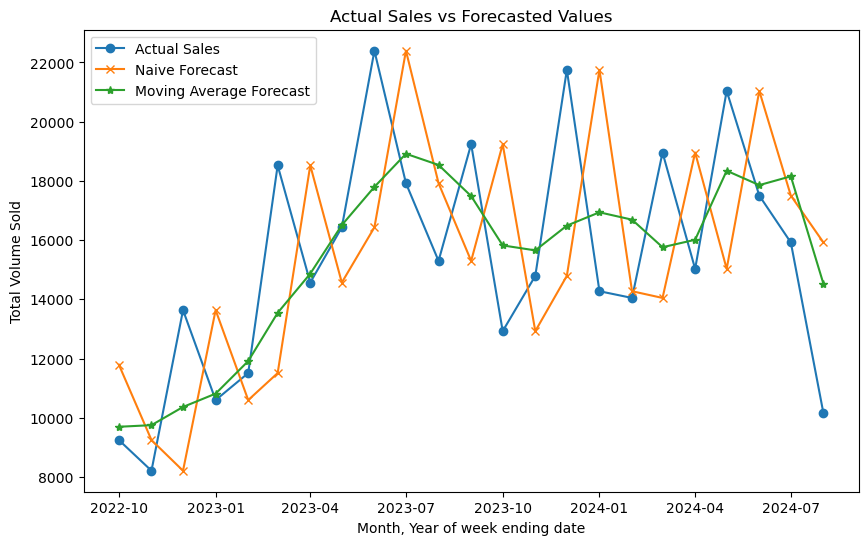

In [226]:
plt.figure(figsize=(10,6))

# Plot the actual sales
plt.plot(df['Month, Year of week ending date'], df['Total Volume Sold'], label='Actual Sales', marker='o')

# Plot the naive forecast
plt.plot(df['Month, Year of week ending date'], df['Naive_forecast'], label='Naive Forecast', marker='x')

# Plot the MA forecast
plt.plot(df['Month, Year of week ending date'], df['MA_forecast'], label='Moving Average Forecast', marker='*')

# Add titles and labels
plt.title('Actual Sales vs Forecasted Values')
plt.xlabel('Month, Year of week ending date')
plt.ylabel('Total Volume Sold')
plt.legend()

plt.show()


<h1>Inferences </h1>

<b> I can see that from this graph, the Moving Average forecast MAE is quite smoother as compared to the Naive Forecast MAE when it comes to comparing it with the Actual Sales. This indicates more stability for Moving Average MAE. 

In [227]:
mae_ma = mean_absolute_error(df['Total Volume Sold'], df['MA_forecast'])
mse_ma = mean_squared_error(df['Total Volume Sold'], df['MA_forecast'])
mape_ma = np.mean(np.abs((df['Total Volume Sold'] - df['MA_forecast']) / df['Total Volume Sold'])) * 100

In [228]:
print(mae_ma)
print(mse_ma)
print(mape_ma)

2173.863050724639
7293589.870750837
14.09868271943426


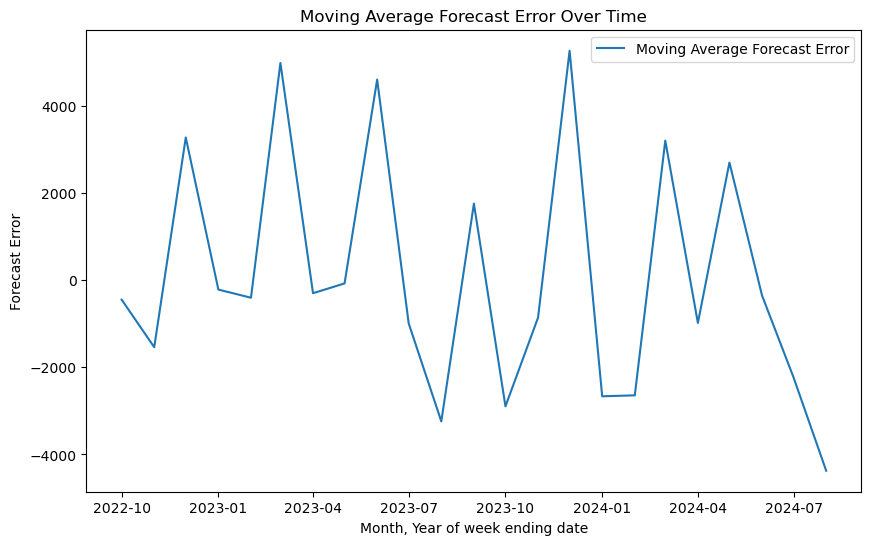

In [229]:
df['error_ma'] = df['Total Volume Sold'] - df['MA_forecast']
plt.figure(figsize=(10,6))
plt.plot(df['Month, Year of week ending date'], df['error_ma'], label='Moving Average Forecast Error')
plt.title('Moving Average Forecast Error Over Time')
plt.xlabel('Month, Year of week ending date')
plt.ylabel('Forecast Error')
plt.legend()
plt.show()

# Week 5: Model Development and Evaluation

In [230]:
df.head()

,"Month, Year of week ending date",Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold,Total Volume Diff,Total Volume Diff2,lag_1,lag_2,...,MA_3,MA_6,MA_12,Sales_Last_Year,Sales_Change_YoY,Moving_Std_3,Sales_Change,Naive_forecast,MA_forecast,error_ma
0,2022-10-01,3213.6615,1655.9880,1815.7755,2559.7930,9245.2180,-2545.9205,-6292.5750,11791.1385,8044.4840,...,9693.613500,8922.891583,7353.396292,5408.4760,3836.7420,1913.151557,-0.215918,11791.1385,9693.613500,-448.395500
1,2022-11-01,3016.5190,1385.7345,1531.7065,2275.2335,8209.1935,-1036.0245,1509.8960,9245.2180,11791.1385,...,9748.516667,9132.334417,7654.184833,4599.7310,3609.4625,1843.248398,-0.112061,9245.2180,9748.516667,-1539.323167
2,2022-12-01,4229.1930,2250.6215,3013.6910,4141.1520,13634.6575,5425.4640,6461.4885,8209.1935,9245.2180,...,10363.023000,10148.111833,8267.171417,6278.8185,7355.8390,2880.283131,0.660901,8209.1935,10363.023000,3271.634500
3,2023-01-01,3588.3865,1827.4735,2086.4285,3092.9865,10595.2750,-3039.3825,-8464.8465,13634.6575,8209.1935,...,10813.042000,10253.327750,8735.475167,4975.6300,5619.6450,2719.279639,-0.222916,13634.6575,10813.042000,-217.767000
4,2023-02-01,3830.8030,1900.5875,2359.5850,3417.0745,11508.0500,912.7750,3952.1575,10595.2750,13634.6575,...,11912.660833,10830.588750,9260.373208,5209.2735,6298.7765,1559.565305,0.086149,10595.2750,11912.660833,-404.610833


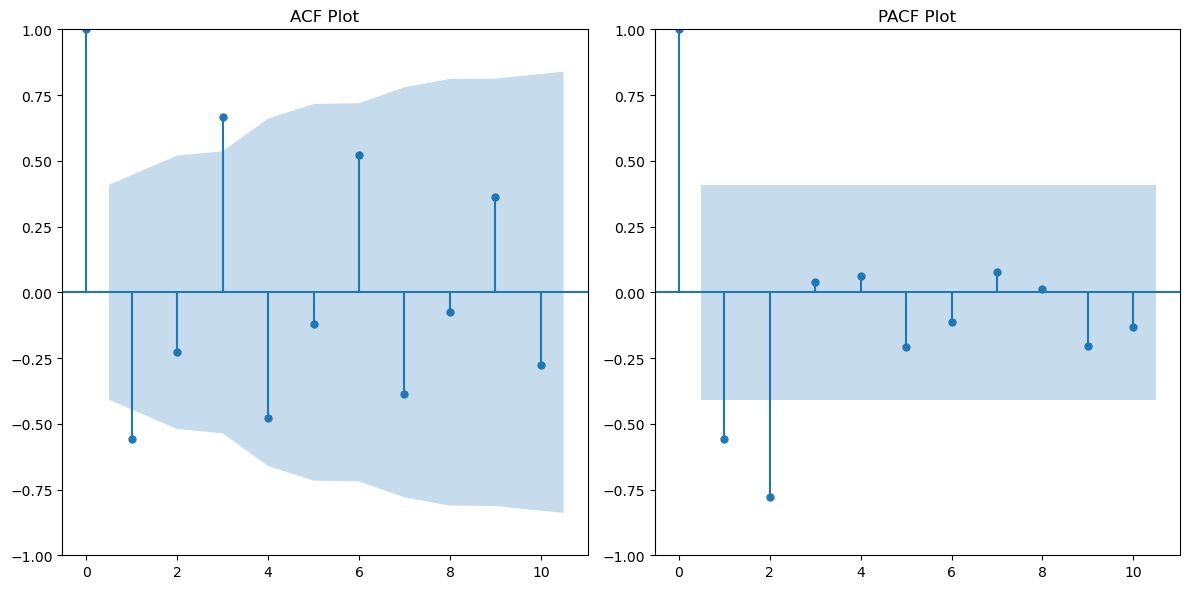

In [231]:
#Determining the p & q value for the ARIMA model

max_lags = 10 

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plot_acf(df['Total Volume Diff2'].dropna(), lags=max_lags, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(1, 2, 2)
plot_pacf(df['Total Volume Diff2'].dropna(), lags=max_lags, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [232]:
#Fitting the Arima model

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Total Volume Sold'], order=(1, 2, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      Total Volume Sold   No. Observations:                   23
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -208.001
Date:                Fri, 01 Nov 2024   AIC                            422.003
Time:                        12:12:12   BIC                            425.136
Sample:                             0   HQIC                           422.683
                                 - 23                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4109      0.367     -1.121      0.262      -1.130       0.308
ma.L1         -0.8288      0.298     -2.783      0.005      -1.413      -0.245
sigma2      3.351e+07   8.25e-10   4.06e+16      0.0

# Inferences

<b> The dependant variable here is the 'Total Volume Sold' column. The number of observations are 23 which means there are 23 data points. For the ARIMA model, we have differenced the Total Volume Sold column twice hence the order is 1,2,1. Moving Average component is 1. </b>

<b> Ljung-Box test shows us a value of 2.14 & Prob(Q) = 0.14. Since the p-value is > 0.05, it indicates that the residuals are likely uncorrelated & means that the model fits well. </b>

<br>
<b> The Jarque-Bera test gives us a value of 2.18 which tells us that the residuals are normal & that the model is performing well. </b>

<br>

<b> Heteroskedasticity shows us a value of 1.08 & indicates that the residuals are constant which is good. </b>

<b> The ARIMA(1, 2, 1) model shows that the MA(1) term is significant, but the AR(1) term is not. </b>

In [233]:
#Fitting another Arima model with 0,2,1


model_new1 = ARIMA(df['Total Volume Sold'], order=(0, 2, 1))
model_new_fit = model_new1.fit()
print(model_new_fit.summary())


df['ARIMA_new_forecast'] = model_new_fit.predict(start=0, end=len(df)-1)
mae_1 = mean_absolute_error(df['Total Volume Sold'], df['ARIMA_new_forecast'])
mse_1 = mean_squared_error(df['Total Volume Sold'], df['ARIMA_new_forecast'])
print(f"ARIMA(0, 2, 1) - MAE: {mae_1}, MSE: {mse_1}")

                               SARIMAX Results                                
Dep. Variable:      Total Volume Sold   No. Observations:                   23
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -208.654
Date:                Fri, 01 Nov 2024   AIC                            421.307
Time:                        12:12:12   BIC                            423.396
Sample:                             0   HQIC                           421.761
                                 - 23                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9979      0.536     -1.861      0.063      -2.049       0.053
sigma2      2.273e+07   2.42e-08   9.38e+14      0.000    2.27e+07    2.27e+07
Ljung-Box (L1) (Q):                   4.84   Jarque-

In [234]:
# Fit ARIMA(1, 2, 0)
model_new2 = ARIMA(df['Total Volume Sold'], order=(1, 2, 0))
model_new_fit2 = model_new2.fit()
print(model_new_fit2.summary())

# Calculate AIC, MAE, MSE for ARIMA(1, 2, 0)
df['ARIMA_new2_forecast'] = model_new_fit2.predict(start=0, end=len(df)-1)
mae_2 = mean_absolute_error(df['Total Volume Sold'], df['ARIMA_new2_forecast'])
mse_2 = mean_squared_error(df['Total Volume Sold'], df['ARIMA_new2_forecast'])
print(f"ARIMA(1, 2, 0) - MAE: {mae_2}, MSE: {mse_2}")

                               SARIMAX Results                                
Dep. Variable:      Total Volume Sold   No. Observations:                   23
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -213.156
Date:                Fri, 01 Nov 2024   AIC                            430.311
Time:                        12:12:12   BIC                            432.400
Sample:                             0   HQIC                           430.765
                                 - 23                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5852      0.225     -2.597      0.009      -1.027      -0.143
sigma2       4.02e+07   3.09e-10    1.3e+17      0.000    4.02e+07    4.02e+07
Ljung-Box (L1) (Q):                   4.91   Jarque-

In [235]:
# Fit ARIMA(2, 2, 2)

model_new3 = ARIMA(df['Total Volume Sold'], order=(2, 2, 2))
model_new_fit3 = model_new3.fit()
print(model_new_fit3.summary())

# Calculate AIC, MAE, MSE for ARIMA(2, 2, 2)
df['ARIMA_new3_forecast'] = model_new_fit3.predict(start=0, end=len(df)-1)
mae_3 = mean_absolute_error(df['Total Volume Sold'], df['ARIMA_new3_forecast'])
mse_3 = mean_squared_error(df['Total Volume Sold'], df['ARIMA_new3_forecast'])
print(f"ARIMA(2, 2, 2) - MAE: {mae_3}, MSE: {mse_3}")

                               SARIMAX Results                                
Dep. Variable:      Total Volume Sold   No. Observations:                   23
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -204.226
Date:                Fri, 01 Nov 2024   AIC                            418.451
Time:                        12:12:12   BIC                            423.674
Sample:                             0   HQIC                           419.584
                                 - 23                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9515      0.453     -2.098      0.036      -1.840      -0.063
ar.L2         -0.6059      0.228     -2.662      0.008      -1.052      -0.160
ma.L1         -0.3806      0.829     -0.459      0.6

# Inferences

<b> The ARIMA(2,2,2) model has the lowest AIC & log likelihood & Both AR terms are significant, and there are no issues with residual autocorrelation.</b>

In [236]:
df.head()

,"Month, Year of week ending date",Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold,Total Volume Diff,Total Volume Diff2,lag_1,lag_2,...,Sales_Last_Year,Sales_Change_YoY,Moving_Std_3,Sales_Change,Naive_forecast,MA_forecast,error_ma,ARIMA_new_forecast,ARIMA_new2_forecast,ARIMA_new3_forecast
0,2022-10-01,3213.6615,1655.9880,1815.7755,2559.7930,9245.2180,-2545.9205,-6292.5750,11791.1385,8044.4840,...,5408.4760,3836.7420,1913.151557,-0.215918,11791.1385,9693.613500,-448.395500,0.000000,0.000000,0.000000
1,2022-11-01,3016.5190,1385.7345,1531.7065,2275.2335,8209.1935,-1036.0245,1509.8960,9245.2180,11791.1385,...,4599.7310,3609.4625,1843.248398,-0.112061,9245.2180,9748.516667,-1539.323167,13867.837211,13104.862820,12924.739694
2,2022-12-01,4229.1930,2250.6215,3013.6910,4141.1520,13634.6575,5425.4640,6461.4885,8209.1935,9245.2180,...,6278.8185,7355.8390,2880.283131,0.660901,8209.1935,10363.023000,3271.634500,10890.938382,13074.947856,11205.522474
3,2023-01-01,3588.3865,1827.4735,2086.4285,3092.9865,10595.2750,-3039.3825,-8464.8465,13634.6575,8209.1935,...,4975.6300,5619.6450,2719.279639,-0.222916,13634.6575,10813.042000,-217.767000,17017.139890,15278.699887,18874.667890
4,2023-02-01,3830.8030,1900.5875,2359.5850,3417.0745,11508.0500,912.7750,3952.1575,10595.2750,13634.6575,...,5209.2735,6298.7765,1559.565305,0.086149,10595.2750,11912.660833,-404.610833,12671.279524,12509.728370,13820.886661


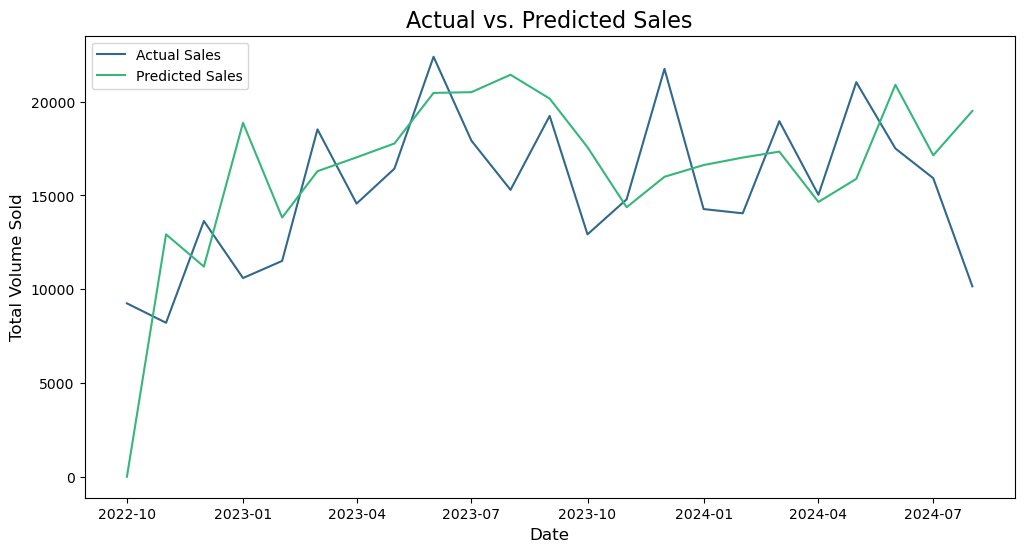

In [237]:
#Line plot for Actuals vs Predicted sales

palette = sns.color_palette("viridis", 2)


plt.figure(figsize=(12, 6))

plt.plot(df['Month, Year of week ending date'], df['Total Volume Sold'], label='Actual Sales', color=palette[0])

plt.plot(df['Month, Year of week ending date'], df['ARIMA_new3_forecast'], label='Predicted Sales', color=palette[1])

plt.title('Actual vs. Predicted Sales', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Volume Sold', fontsize=12)

plt.legend()
plt.show()

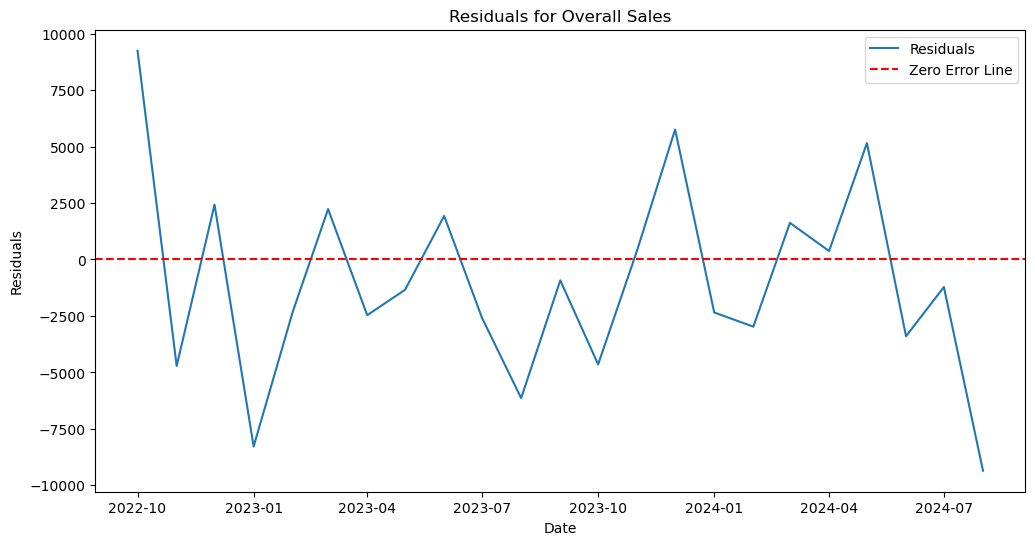

In [238]:
#Residual Plot

df['Residuals'] = df['Total Volume Sold'] - df['ARIMA_new3_forecast']

plt.figure(figsize=(12, 6))
plt.plot(df['Month, Year of week ending date'], df['Residuals'], label='Residuals')
plt.axhline(0, color='r', linestyle='--', label='Zero Error Line')
plt.title('Residuals for Overall Sales')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

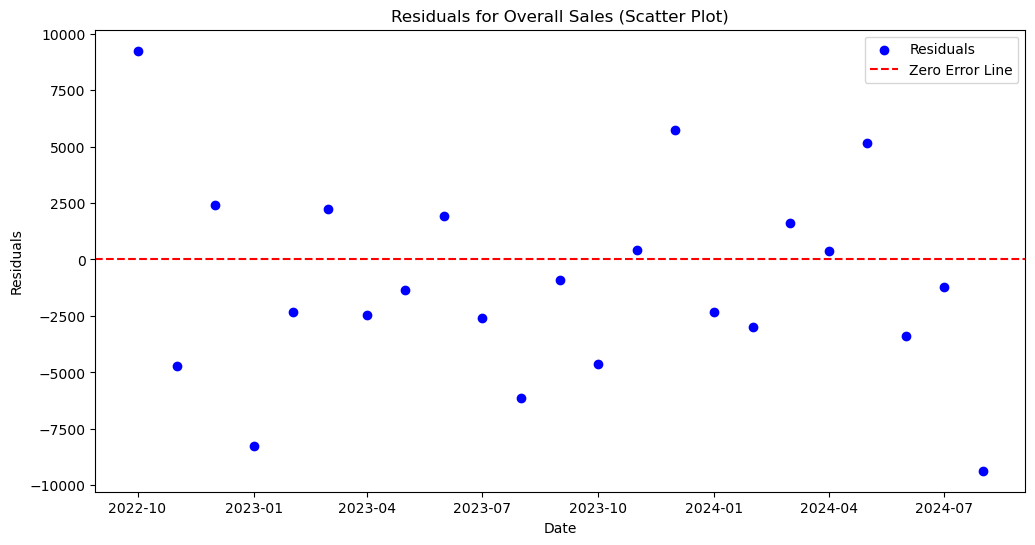

In [239]:

df['Residuals'] = df['Total Volume Sold'] - df['ARIMA_new3_forecast']

# Scatter plot for residuals
plt.figure(figsize=(12, 6))
plt.scatter(df['Month, Year of week ending date'], df['Residuals'], label='Residuals', color='blue')
plt.axhline(0, color='r', linestyle='--', label='Zero Error Line')
plt.title('Residuals for Overall Sales (Scatter Plot)')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()


# Inferences

<b> Residuals that are exactly on the zero error line tell us that the model has predicted the actual sales perfectly for that particular data point & it can be considered as a perfect residual.</b>

<b> Points above the zero line tell us that the model underestimated the actual sales. This means the predicted value was lower than the actual value are the positive rsiduals </b>

<b> The negative residuals are those points that lie below the zero line which means that the model overestimated the actual sales. This means the predicted value was higher than the actual value. </b>

In [240]:
#For the next week i will be investigating to see what can be done with the 14 negative points below the 
#zero error line. and will also be doing the further steps to it.

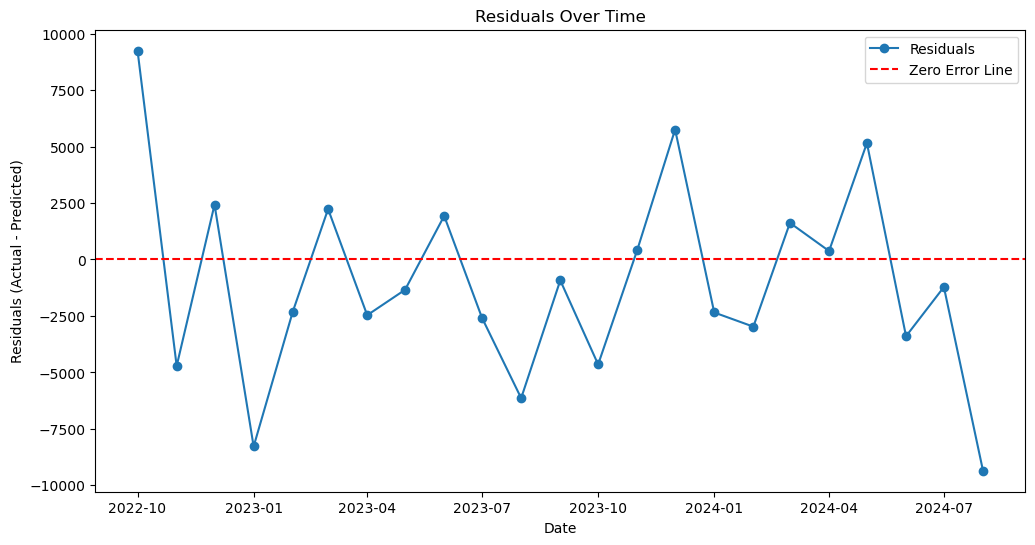

In [241]:
plt.figure(figsize=(12, 6))
plt.plot(df['Month, Year of week ending date'], df['Residuals'], label='Residuals', marker='o')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Error Line')
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.show()

In [242]:
df.head()

,"Month, Year of week ending date",Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold,Total Volume Diff,Total Volume Diff2,lag_1,lag_2,...,Sales_Change_YoY,Moving_Std_3,Sales_Change,Naive_forecast,MA_forecast,error_ma,ARIMA_new_forecast,ARIMA_new2_forecast,ARIMA_new3_forecast,Residuals
0,2022-10-01,3213.6615,1655.9880,1815.7755,2559.7930,9245.2180,-2545.9205,-6292.5750,11791.1385,8044.4840,...,3836.7420,1913.151557,-0.215918,11791.1385,9693.613500,-448.395500,0.000000,0.000000,0.000000,9245.218000
1,2022-11-01,3016.5190,1385.7345,1531.7065,2275.2335,8209.1935,-1036.0245,1509.8960,9245.2180,11791.1385,...,3609.4625,1843.248398,-0.112061,9245.2180,9748.516667,-1539.323167,13867.837211,13104.862820,12924.739694,-4715.546194
2,2022-12-01,4229.1930,2250.6215,3013.6910,4141.1520,13634.6575,5425.4640,6461.4885,8209.1935,9245.2180,...,7355.8390,2880.283131,0.660901,8209.1935,10363.023000,3271.634500,10890.938382,13074.947856,11205.522474,2429.135026
3,2023-01-01,3588.3865,1827.4735,2086.4285,3092.9865,10595.2750,-3039.3825,-8464.8465,13634.6575,8209.1935,...,5619.6450,2719.279639,-0.222916,13634.6575,10813.042000,-217.767000,17017.139890,15278.699887,18874.667890,-8279.392890
4,2023-02-01,3830.8030,1900.5875,2359.5850,3417.0745,11508.0500,912.7750,3952.1575,10595.2750,13634.6575,...,6298.7765,1559.565305,0.086149,10595.2750,11912.660833,-404.610833,12671.279524,12509.728370,13820.886661,-2312.836661


# Week 6 : Seasonal Decomposition and Holt-Winters Method

In [243]:
#Holt winters model

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [244]:
seasonal_periods = 6

model = ExponentialSmoothing(df['Total Volume Sold'], seasonal='multiplicative', seasonal_periods=seasonal_periods)

In [245]:
hw_fit = model.fit()

In [246]:
df['Holt_Winters_Forecast'] = hw_fit.fittedvalues

In [247]:
df.head()

,"Month, Year of week ending date",Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold,Total Volume Diff,Total Volume Diff2,lag_1,lag_2,...,Moving_Std_3,Sales_Change,Naive_forecast,MA_forecast,error_ma,ARIMA_new_forecast,ARIMA_new2_forecast,ARIMA_new3_forecast,Residuals,Holt_Winters_Forecast
0,2022-10-01,3213.6615,1655.9880,1815.7755,2559.7930,9245.2180,-2545.9205,-6292.5750,11791.1385,8044.4840,...,1913.151557,-0.215918,11791.1385,9693.613500,-448.395500,0.000000,0.000000,0.000000,9245.218000,11067.864916
1,2022-11-01,3016.5190,1385.7345,1531.7065,2275.2335,8209.1935,-1036.0245,1509.8960,9245.2180,11791.1385,...,1843.248398,-0.112061,9245.2180,9748.516667,-1539.323167,13867.837211,13104.862820,12924.739694,-4715.546194,11531.193807
2,2022-12-01,4229.1930,2250.6215,3013.6910,4141.1520,13634.6575,5425.4640,6461.4885,8209.1935,9245.2180,...,2880.283131,0.660901,8209.1935,10363.023000,3271.634500,10890.938382,13074.947856,11205.522474,2429.135026,14320.472908
3,2023-01-01,3588.3865,1827.4735,2086.4285,3092.9865,10595.2750,-3039.3825,-8464.8465,13634.6575,8209.1935,...,2719.279639,-0.222916,13634.6575,10813.042000,-217.767000,17017.139890,15278.699887,18874.667890,-8279.392890,10064.788561
4,2023-02-01,3830.8030,1900.5875,2359.5850,3417.0745,11508.0500,912.7750,3952.1575,10595.2750,13634.6575,...,1559.565305,0.086149,10595.2750,11912.660833,-404.610833,12671.279524,12509.728370,13820.886661,-2312.836661,9514.651297


In [248]:
df['Holt_Winters_Forecast'].value_counts()

11067.864916    1
14213.839874    1
15780.303271    1
25097.252354    1
15666.919255    1
13353.821851    1
18946.029771    1
13808.735320    1
15360.985434    1
21213.030354    1
15284.538720    1
20807.465475    1
11531.193807    1
15253.286776    1
15496.461325    1
21090.021355    1
14018.923701    1
11185.956340    1
14066.013746    1
9514.651297     1
10064.788561    1
14320.472908    1
14657.797825    1
Name: Holt_Winters_Forecast, dtype: int64

In [249]:
#Comparing both

seasonal_model_6 = ExponentialSmoothing(df['Total Volume Sold'], seasonal = 'multiplicative', seasonal_periods = 6)
holtwinter_6 = seasonal_model_6.fit()

df['Holt_Winters_Forecast_6'] = holtwinter_6.fittedvalues

seasonal_model_10 = ExponentialSmoothing(df['Total Volume Sold'], seasonal = 'multiplicative', seasonal_periods = 10)
holtwinter_10 = seasonal_model_10.fit()

df['Holt_Winters_Forecast_10'] = holtwinter_10.fittedvalues

#Metric calculation for both of these models

mae_6 = mean_absolute_error(df['Total Volume Sold'], df['Holt_Winters_Forecast_6'])
mae_10 = mean_absolute_error(df['Total Volume Sold'], df['Holt_Winters_Forecast_10'])

mse_6 = mean_squared_error(df['Total Volume Sold'], df['Holt_Winters_Forecast_6'])
mse_10 = mean_squared_error(df['Total Volume Sold'], df['Holt_Winters_Forecast_10'])

print("Mean Squared Error for Model 6 :", mse_6)
print("Mean Squared Error for Model 10 :", mse_10)
print("Mean Absolute Error for Model 6 :", mae_6)
print("Mean Absolute Error for Model 10 :", mae_10)

Mean Squared Error for Model 6 : 7796367.871656599
Mean Squared Error for Model 10 : 13384355.900630224
Mean Absolute Error for Model 6 : 2038.5346908411536
Mean Absolute Error for Model 10 : 3079.9956418553843


# Inferences

<b> Model Selection: So when we perfomed the Holt winters forecast for model 6 vs Model 10 for both MSE and MAE, Model 6 is the better choice for forecasting. It consistently shows lower errors compared to Model 10 which is indicating better overall predictive performance. </b>

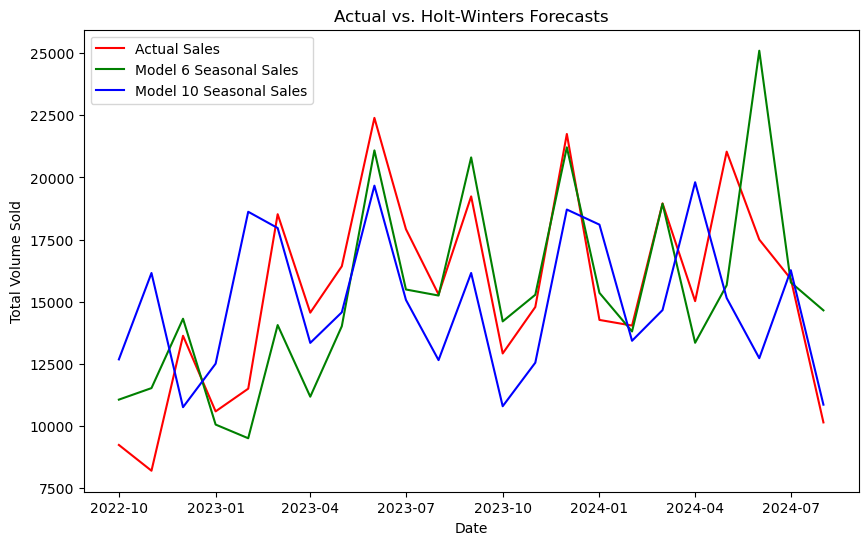

In [250]:
#Visualization for Model 6 vs Model 10

plt.figure(figsize = (10,6))
plt.plot(df['Month, Year of week ending date'], df["Total Volume Sold"], label= 'Actual Sales', color = 'red')
plt.plot(df['Month, Year of week ending date'], df['Holt_Winters_Forecast_6'], label= 'Model 6 Seasonal Sales', color = 'green')
plt.plot(df['Month, Year of week ending date'], df['Holt_Winters_Forecast_10'], label = 'Model 10 Seasonal Sales', color = 'blue')
plt.title('Actual vs. Holt-Winters Forecasts')
plt.xlabel('Date')
plt.ylabel('Total Volume Sold')
plt.legend()
plt.show()

# Inferences

<b> The plot shows us that the Model 6 closely replicates the actual sales and we can proceed using the Model 6 instead of the Model 10.</b>

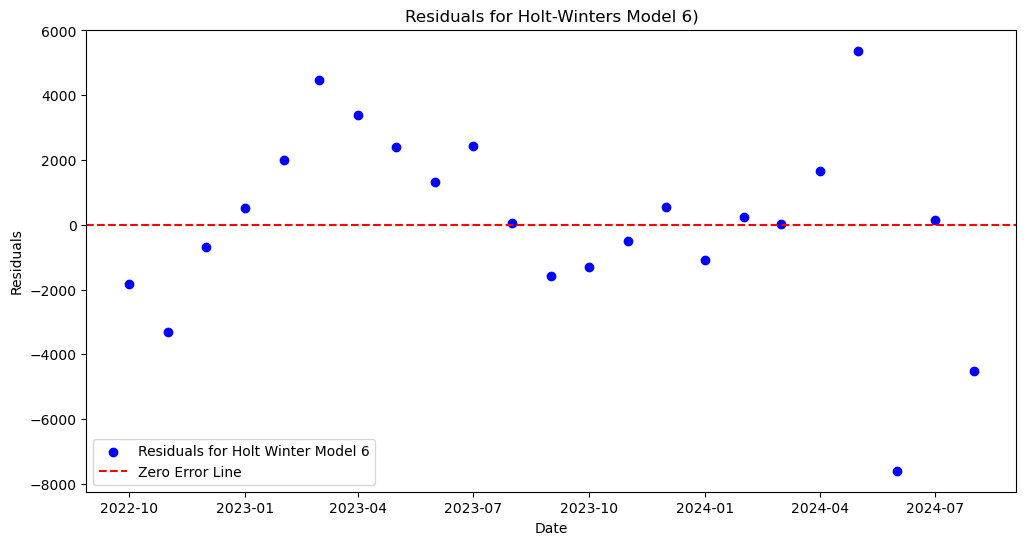

In [251]:
#Residual analysis

#Model 6
df['Residuals_HoltWintermodel_6'] = df['Total Volume Sold'] - df['Holt_Winters_Forecast_6']


plt.figure(figsize=(12, 6))
plt.scatter(df['Month, Year of week ending date'], df['Residuals_HoltWintermodel_6'], color='blue', label='Residuals for Holt Winter Model 6')
plt.axhline(0, color='r', linestyle='--', label='Zero Error Line')
plt.title('Residuals for Holt-Winters Model 6)')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

<b> Now i am going to be comparing this Model 6 to the ARIMA(2,2,2) model which will be quite interesting to see since i feel like Model 6 of Holt winter is performing better based on the visualizations seen for the zero line errors between both these models. </b>

In [252]:
# For ARIMA model
mae_arima = mean_absolute_error(df['Total Volume Sold'], df['ARIMA_new3_forecast'])
mse_arima = mean_squared_error(df['Total Volume Sold'], df['ARIMA_new3_forecast'])

# For Holt-Winters model (seasonal period 6)
mae_hw = mean_absolute_error(df['Total Volume Sold'], df['Holt_Winters_Forecast_6'])
mse_hw = mean_squared_error(df['Total Volume Sold'], df['Holt_Winters_Forecast_6'])

# Print the results for comparison
print("ARIMA(2,2,2) - MAE:", mae_arima, "MSE:", mse_arima)
print("Holt-Winters (Seasonal 6) - MAE:", mae_hw, "MSE:", mse_hw)

ARIMA(2,2,2) - MAE: 3559.505442305955 MSE: 19498481.80005085
Holt-Winters (Seasonal 6) - MAE: 2038.5346908411536 MSE: 7796367.871656599


# Inferences

<b> Holt-Winters is clearly performing better & is capturing trends as well as seasonal patterns more effectively than ARIMA in this case. I will be moving forward with Holt-Winters Seasonal 6 model as my best model for this dataset.</b>

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Month, Year of week ending date  23 non-null     datetime64[ns]
 1   Volume Sold - East               23 non-null     float64       
 2   Volume Sold - West               23 non-null     float64       
 3   Volume Sold - South              23 non-null     float64       
 4   Volume Sold - Midwest            23 non-null     float64       
 5   Total Volume Sold                23 non-null     float64       
 6   Total Volume Diff                23 non-null     float64       
 7   Total Volume Diff2               23 non-null     float64       
 8   lag_1                            23 non-null     float64       
 9   lag_2                            23 non-null     float64       
 10  lag_3                            23 non-null     float64       


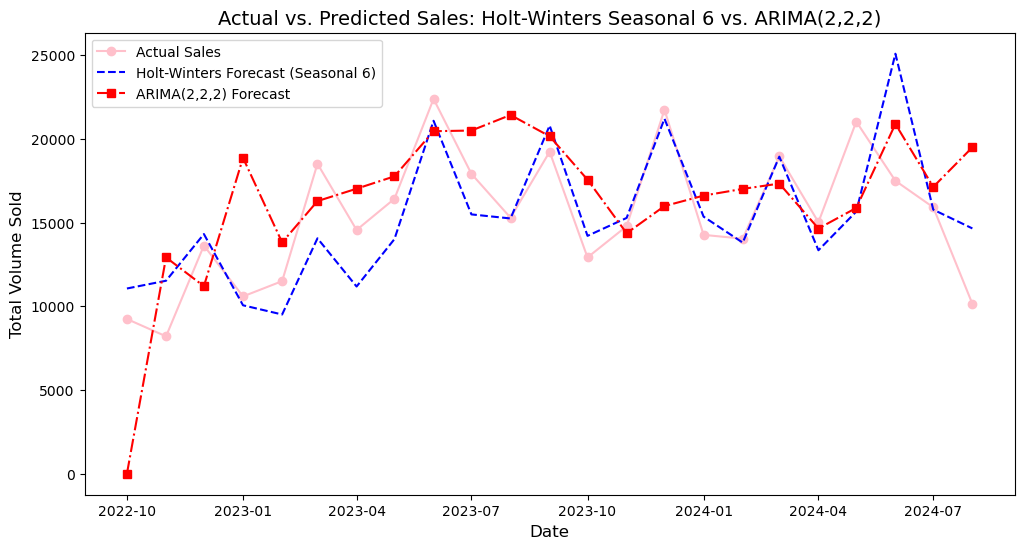

In [254]:
#visualization for Actuals vs ARIMA(2,2,2) vs Holt Winters Model 6
plt.figure(figsize=(12, 6))

plt.plot(df['Month, Year of week ending date'], df['Total Volume Sold'], label='Actual Sales', color= 'pink', marker='o')
plt.plot(df['Month, Year of week ending date'], df['Holt_Winters_Forecast_6'], label='Holt-Winters Forecast (Seasonal 6)', color= 'blue', linestyle='--')
plt.plot(df['Month, Year of week ending date'], df['ARIMA_new3_forecast'], label='ARIMA(2,2,2) Forecast', color= 'red', linestyle='-.', marker='s')

plt.title('Actual vs. Predicted Sales: Holt-Winters Seasonal 6 vs. ARIMA(2,2,2)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Volume Sold', fontsize=12)

plt.legend()

plt.show()

# Inferences

<b> From this we can understand that the Holt winters model 6 is performing better against the Actual sales value and it closely replicates it. This is the best choice of model to proceed with. </b>

In [255]:
df.head()

,"Month, Year of week ending date",Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold,Total Volume Diff,Total Volume Diff2,lag_1,lag_2,...,MA_forecast,error_ma,ARIMA_new_forecast,ARIMA_new2_forecast,ARIMA_new3_forecast,Residuals,Holt_Winters_Forecast,Holt_Winters_Forecast_6,Holt_Winters_Forecast_10,Residuals_HoltWintermodel_6
0,2022-10-01,3213.6615,1655.9880,1815.7755,2559.7930,9245.2180,-2545.9205,-6292.5750,11791.1385,8044.4840,...,9693.613500,-448.395500,0.000000,0.000000,0.000000,9245.218000,11067.864916,11067.864916,12685.913474,-1822.646916
1,2022-11-01,3016.5190,1385.7345,1531.7065,2275.2335,8209.1935,-1036.0245,1509.8960,9245.2180,11791.1385,...,9748.516667,-1539.323167,13867.837211,13104.862820,12924.739694,-4715.546194,11531.193807,11531.193807,16159.039511,-3322.000307
2,2022-12-01,4229.1930,2250.6215,3013.6910,4141.1520,13634.6575,5425.4640,6461.4885,8209.1935,9245.2180,...,10363.023000,3271.634500,10890.938382,13074.947856,11205.522474,2429.135026,14320.472908,14320.472908,10763.792101,-685.815408
3,2023-01-01,3588.3865,1827.4735,2086.4285,3092.9865,10595.2750,-3039.3825,-8464.8465,13634.6575,8209.1935,...,10813.042000,-217.767000,17017.139890,15278.699887,18874.667890,-8279.392890,10064.788561,10064.788561,12513.380026,530.486439
4,2023-02-01,3830.8030,1900.5875,2359.5850,3417.0745,11508.0500,912.7750,3952.1575,10595.2750,13634.6575,...,11912.660833,-404.610833,12671.279524,12509.728370,13820.886661,-2312.836661,9514.651297,9514.651297,18621.736516,1993.398703


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Month, Year of week ending date  23 non-null     datetime64[ns]
 1   Volume Sold - East               23 non-null     float64       
 2   Volume Sold - West               23 non-null     float64       
 3   Volume Sold - South              23 non-null     float64       
 4   Volume Sold - Midwest            23 non-null     float64       
 5   Total Volume Sold                23 non-null     float64       
 6   Total Volume Diff                23 non-null     float64       
 7   Total Volume Diff2               23 non-null     float64       
 8   lag_1                            23 non-null     float64       
 9   lag_2                            23 non-null     float64       
 10  lag_3                            23 non-null     float64       


In [257]:
time_periods = 6
future_dates = pd.date_range(start=df['Month, Year of week ending date'].iloc[-1] + pd.DateOffset(1), 
                              periods=time_periods, freq='M')


hw_model = ExponentialSmoothing(df['Total Volume Sold'], seasonal='multiplicative', seasonal_periods=6)
hw_fit = hw_model.fit()


forecast = hw_fit.forecast(time_periods)


forecast_df = pd.DataFrame({'Month, Year of week ending date': future_dates, 'Forecasted Sales': forecast})

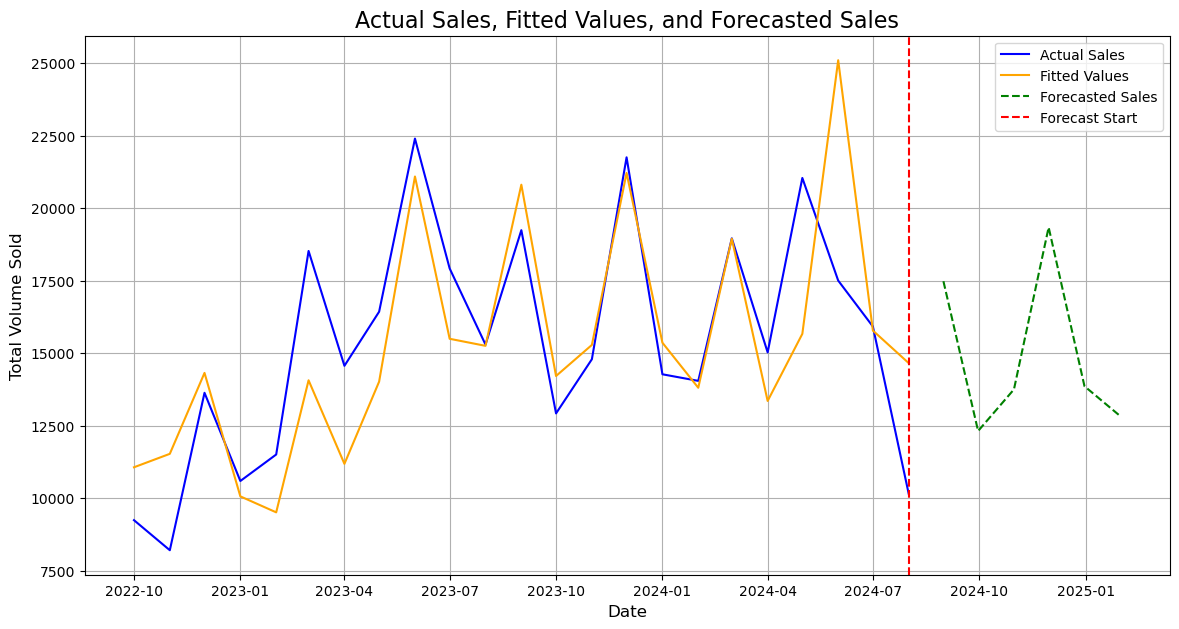

In [258]:
plt.figure(figsize=(14, 7))

plt.plot(df['Month, Year of week ending date'], df['Total Volume Sold'], label='Actual Sales', color='blue')


plt.plot(df['Month, Year of week ending date'], hw_fit.fittedvalues, label='Fitted Values', color='orange')


plt.plot(forecast_df['Month, Year of week ending date'], forecast_df['Forecasted Sales'], label='Forecasted Sales', color='green', linestyle='--')


plt.title('Actual Sales, Fitted Values, and Forecasted Sales', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Volume Sold', fontsize=12)
plt.axvline(x=df['Month, Year of week ending date'].iloc[-1], color='red', linestyle='--', label='Forecast Start')
plt.legend()
plt.grid()
plt.show()

In [259]:
df.head()

,"Month, Year of week ending date",Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold,Total Volume Diff,Total Volume Diff2,lag_1,lag_2,...,MA_forecast,error_ma,ARIMA_new_forecast,ARIMA_new2_forecast,ARIMA_new3_forecast,Residuals,Holt_Winters_Forecast,Holt_Winters_Forecast_6,Holt_Winters_Forecast_10,Residuals_HoltWintermodel_6
0,2022-10-01,3213.6615,1655.9880,1815.7755,2559.7930,9245.2180,-2545.9205,-6292.5750,11791.1385,8044.4840,...,9693.613500,-448.395500,0.000000,0.000000,0.000000,9245.218000,11067.864916,11067.864916,12685.913474,-1822.646916
1,2022-11-01,3016.5190,1385.7345,1531.7065,2275.2335,8209.1935,-1036.0245,1509.8960,9245.2180,11791.1385,...,9748.516667,-1539.323167,13867.837211,13104.862820,12924.739694,-4715.546194,11531.193807,11531.193807,16159.039511,-3322.000307
2,2022-12-01,4229.1930,2250.6215,3013.6910,4141.1520,13634.6575,5425.4640,6461.4885,8209.1935,9245.2180,...,10363.023000,3271.634500,10890.938382,13074.947856,11205.522474,2429.135026,14320.472908,14320.472908,10763.792101,-685.815408
3,2023-01-01,3588.3865,1827.4735,2086.4285,3092.9865,10595.2750,-3039.3825,-8464.8465,13634.6575,8209.1935,...,10813.042000,-217.767000,17017.139890,15278.699887,18874.667890,-8279.392890,10064.788561,10064.788561,12513.380026,530.486439
4,2023-02-01,3830.8030,1900.5875,2359.5850,3417.0745,11508.0500,912.7750,3952.1575,10595.2750,13634.6575,...,11912.660833,-404.610833,12671.279524,12509.728370,13820.886661,-2312.836661,9514.651297,9514.651297,18621.736516,1993.398703


# Week 6 updated changes by Professor : Comparing the p,d,q values of ARIMA

In [260]:
#Warnings to be removed

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [261]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [262]:
from pmdarima import auto_arima

In [263]:
auto_model = auto_arima(df['Total Volume Sold'], seasonal=False, trace=True)
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=456.937, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=512.166, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=458.213, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=455.218, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=483.505, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=453.808, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=455.729, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=456.131, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=452.179, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=449.399, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=448.929, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=449.573, Time=0.00 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.357 seconds
                               SARIMAX 

# Inferences

<b> From this we come to know that ARIMA(0,0,0) is the best model from the ARIMA comparisions. Previously, i had selected ARIMA(2,2,2) but will now compare ARIMA(0,0,0) to Holt winters model. </b>

In [264]:
model_for000 = ARIMA(df['Total Volume Sold'], order=(0, 0, 0))
model_new_fit000 = model_for000.fit()
print(model_new_fit.summary())


df['ARIMA_new_forecast_Model000'] = model_new_fit000.predict(start=0, end=len(df)-1)
mae_1 = mean_absolute_error(df['Total Volume Sold'], df['ARIMA_new_forecast_Model000'])
mse_1 = mean_squared_error(df['Total Volume Sold'], df['ARIMA_new_forecast_Model000'])
print(f"ARIMA(0, 0, 0) - MAE: {mae_1}, MSE: {mse_1}")

                               SARIMAX Results                                
Dep. Variable:      Total Volume Sold   No. Observations:                   23
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -208.654
Date:                Fri, 01 Nov 2024   AIC                            421.307
Time:                        12:12:35   BIC                            423.396
Sample:                             0   HQIC                           421.761
                                 - 23                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9979      0.536     -1.861      0.063      -2.049       0.053
sigma2      2.273e+07   2.42e-08   9.38e+14      0.000    2.27e+07    2.27e+07
Ljung-Box (L1) (Q):                   4.84   Jarque-

In [265]:
df.head()

,"Month, Year of week ending date",Volume Sold - East,Volume Sold - West,Volume Sold - South,Volume Sold - Midwest,Total Volume Sold,Total Volume Diff,Total Volume Diff2,lag_1,lag_2,...,error_ma,ARIMA_new_forecast,ARIMA_new2_forecast,ARIMA_new3_forecast,Residuals,Holt_Winters_Forecast,Holt_Winters_Forecast_6,Holt_Winters_Forecast_10,Residuals_HoltWintermodel_6,ARIMA_new_forecast_Model000
0,2022-10-01,3213.6615,1655.9880,1815.7755,2559.7930,9245.2180,-2545.9205,-6292.5750,11791.1385,8044.4840,...,-448.395500,0.000000,0.000000,0.000000,9245.218000,11067.864916,11067.864916,12685.913474,-1822.646916,15389.124847
1,2022-11-01,3016.5190,1385.7345,1531.7065,2275.2335,8209.1935,-1036.0245,1509.8960,9245.2180,11791.1385,...,-1539.323167,13867.837211,13104.862820,12924.739694,-4715.546194,11531.193807,11531.193807,16159.039511,-3322.000307,15389.124847
2,2022-12-01,4229.1930,2250.6215,3013.6910,4141.1520,13634.6575,5425.4640,6461.4885,8209.1935,9245.2180,...,3271.634500,10890.938382,13074.947856,11205.522474,2429.135026,14320.472908,14320.472908,10763.792101,-685.815408,15389.124847
3,2023-01-01,3588.3865,1827.4735,2086.4285,3092.9865,10595.2750,-3039.3825,-8464.8465,13634.6575,8209.1935,...,-217.767000,17017.139890,15278.699887,18874.667890,-8279.392890,10064.788561,10064.788561,12513.380026,530.486439,15389.124847
4,2023-02-01,3830.8030,1900.5875,2359.5850,3417.0745,11508.0500,912.7750,3952.1575,10595.2750,13634.6575,...,-404.610833,12671.279524,12509.728370,13820.886661,-2312.836661,9514.651297,9514.651297,18621.736516,1993.398703,15389.124847


In [266]:
# For ARIMA model
mae_arima_000 = mean_absolute_error(df['Total Volume Sold'], df['ARIMA_new_forecast_Model000'])
mse_arima_000 = mean_squared_error(df['Total Volume Sold'], df['ARIMA_new_forecast_Model000'])

# For Holt-Winters model (seasonal period 6)
mae_hw = mean_absolute_error(df['Total Volume Sold'], df['Holt_Winters_Forecast_6'])
mse_hw = mean_squared_error(df['Total Volume Sold'], df['Holt_Winters_Forecast_6'])

# Print the results for comparison
print("ARIMA(0,0,0) - MAE:", mae_arima, "MSE:", mse_arima)
print("Holt-Winters (Seasonal 6) - MAE:", mae_hw, "MSE:", mse_hw)

ARIMA(0,0,0) - MAE: 3559.505442305955 MSE: 19498481.80005085
Holt-Winters (Seasonal 6) - MAE: 2038.5346908411536 MSE: 7796367.871656599


# Inferences

<b> This shows us that while ARIMA(0,0,0) is good, the Holt-winters Seasonal 6 model is better and ideal for this forecasting since it has a lower error and is capturing the underlying trends better. </b>

# Week 7 : Machine Learning-Based Forecasting Models

In [267]:
target = 'Total Volume Sold'
features = [
    'lag_1', 'lag_2', 'lag_3', 'MA_3', 'MA_6', 'MA_12', 
    'Sales_Last_Year', 'Sales_Change_YoY', 'Moving_Std_3' ]

In [268]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Separate features and target
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

In [269]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [270]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor 

In [271]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [272]:
#Random Forest Model 

randomforestmodel = RandomForestRegressor(n_estimators=100, random_state=42)
randomforestmodel.fit(X_train_scaled, y_train)

random_forest_predictions = randomforestmodel.predict(X_test_scaled)

In [273]:
xgboost_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgboost_model.fit(X_train_scaled, y_train)

xgboost_predictions = xgboost_model.predict(X_test_scaled)

# Finding the model performance

In [274]:
randomforest_mae = mean_absolute_error(y_test, random_forest_predictions)
randomforest_mse = mean_squared_error(y_test, random_forest_predictions)

# Evaluate XGBoost
xgboost_mae = mean_absolute_error(y_test, xgboost_predictions)
xgboost_mae = mean_squared_error(y_test, xgboost_predictions)

print(f"Random Forest - MAE: {randomforest_mae}, MSE: {randomforest_mse}")
print(f"XGBoost - MAE: {xgboost_mae}, MSE: {xgboost_mae}")

Random Forest - MAE: 3151.603906000003, MSE: 20393485.877935965
XGBoost - MAE: 29102215.925952435, MSE: 29102215.925952435


# Inferences

<b> From this we can see that the Random Forest model performs better than the XGBoost model. The errors are quite low for the Random Forest model. </b>

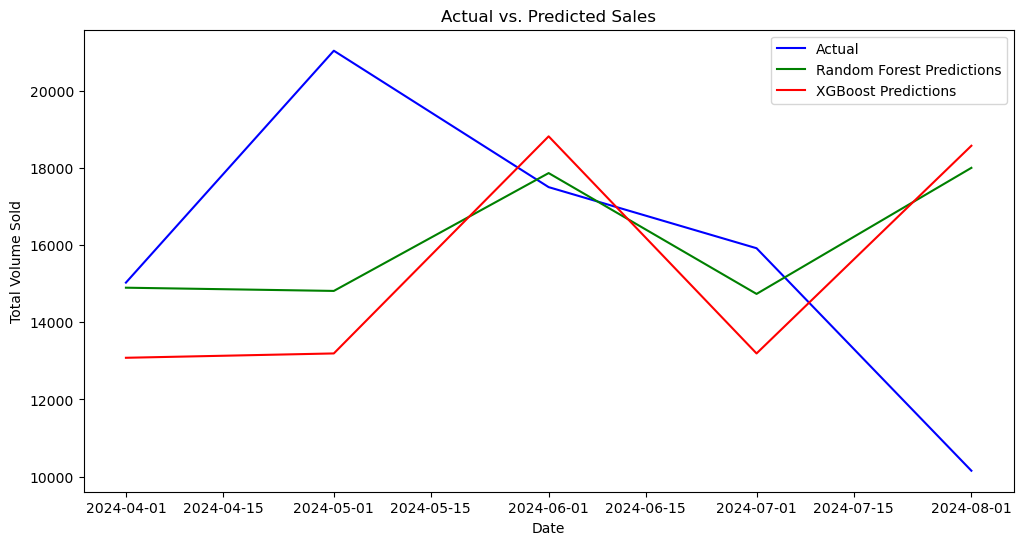

In [275]:
plt.figure(figsize=(12, 6))
plt.plot(test['Month, Year of week ending date'], y_test, label='Actual', color='blue')
plt.plot(test['Month, Year of week ending date'], random_forest_predictions, label='Random Forest Predictions', color='green')
plt.plot(test['Month, Year of week ending date'], xgboost_predictions, label='XGBoost Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Total Volume Sold')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()

In [276]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [277]:
#Random Forest

randomforest_parameters = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
randomforest_grid = GridSearchCV(RandomForestRegressor(), randomforest_parameters, cv=5, scoring='neg_mean_absolute_error')
randomforest_grid.fit(X_train_scaled, y_train)
best_randomforest_model = randomforest_grid.best_estimator_

#XGBoost
xgboost_parameters = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}
xgboost_grid = GridSearchCV(XGBRegressor(), xgboost_parameters, cv=5, scoring='neg_mean_absolute_error')
xgboost_grid.fit(X_train_scaled, y_train)
best_xgb_model = xgboost_grid.best_estimator_

In [278]:
randomforest_cv_scores = cross_val_score(best_randomforest_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Random Forest CV MAE:", -randomforest_cv_scores.mean())


xgboost_cv_scores = cross_val_score(best_xgb_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
print("XGBoost CV MAE:", -xgboost_cv_scores.mean())

Random Forest CV MAE: 2576.6980616666688
XGBoost CV MAE: 2296.206454166667


In [279]:
holt_winters_mae = 2038.53  
rf_cv_mae = 2576.86  
xgb_cv_mae = 2296.21  


print("Comparison of MAEs:")
print(f"Holt-Winters MAE: {holt_winters_mae}")
print(f"Random Forest CV MAE: {rf_cv_mae}")
print(f"XGBoost CV MAE: {xgb_cv_mae}")


if holt_winters_mae < rf_cv_mae and holt_winters_mae < xgb_cv_mae:
    print("Holt-Winters model has the lowest MAE, suggesting it might be the best fit.")
elif rf_cv_mae < holt_winters_mae and rf_cv_mae < xgb_cv_mae:
    print("Random Forest model has the lowest MAE, suggesting it might be the best fit.")
else:
    print("XGBoost model has the lowest MAE, hence it might be the best fit.")

Comparison of MAEs:
Holt-Winters MAE: 2038.53
Random Forest CV MAE: 2576.86
XGBoost CV MAE: 2296.21
Holt-Winters model has the lowest MAE, suggesting it might be the best fit.


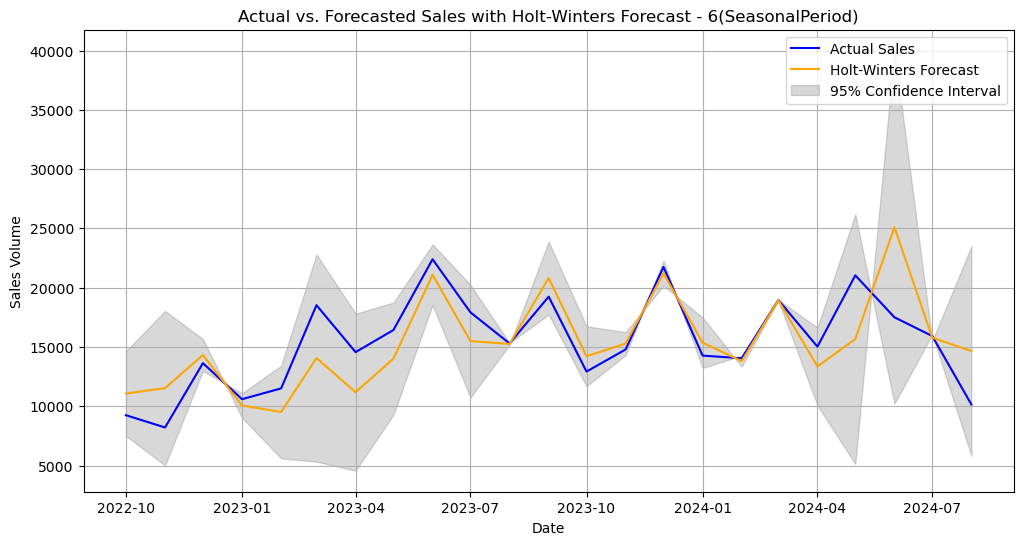

In [280]:
confidenceinterval_lower = df['Holt_Winters_Forecast_6'] - 1.96 * df['Residuals_HoltWintermodel_6']
confidenceinterval_upper = df['Holt_Winters_Forecast_6'] + 1.96 * df['Residuals_HoltWintermodel_6']

plt.figure(figsize=(12, 6))

plt.plot(df['Month, Year of week ending date'], df['Total Volume Sold'], label='Actual Sales', color='blue')

plt.plot(df['Month, Year of week ending date'], df['Holt_Winters_Forecast_6'], label='Holt-Winters Forecast', color='orange')

plt.fill_between(df['Month, Year of week ending date'], confidenceinterval_lower, confidenceinterval_upper, color='gray', alpha=0.3, label='95% Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.title('Actual vs. Forecasted Sales with Holt-Winters Forecast - 6(SeasonalPeriod)')
plt.legend()
plt.grid()
plt.show()

# Inferences

<b>The Holt-Winters model captures the sales trend and seasonality within an expected range. This tells us that the 
   model is neither too far off from actual sales values nor too sensitive to fluctuations. This also tells us that the errors are controlled. </b>

In [281]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(df['Total Volume Sold'], 
                                seasonal='multiplicative', 
                                seasonal_periods=6).fit()

count_forecast_steps = 1
hw_forecast = hw_model.forecast(steps=count_forecast_steps)


next_actual_value = df['Total Volume Sold'].iloc[-1]


forecasted_value = hw_forecast.iloc[0]
difference = next_actual_value - forecasted_value


print(f"Next Actual Value: {next_actual_value}")
print(f"Forecasted Value: {forecasted_value}")
print(f"Difference (Actual - Forecast): {difference}")

Next Actual Value: 10151.933
Forecasted Value: 17480.96512155554
Difference (Actual - Forecast): -7329.032121555538


# Inferences

In [ ]:
#The Forecasted value looks alot ahead that the next actual value and the difference seems to be significant. In next week's submission, 
#i will be exploring some ensemble techniques to see if we can improve the accuracy of the forecasts.